<a href="https://colab.research.google.com/github/efnelson12/EQuaTe_Scripts/blob/main/nURGplots_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [324]:
#script to produce anonymised data for the Heidelberg basin team
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [325]:
FAA_per = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EQuaTe data/Germany/HeidelbergBasin/PercentFrees.csv", sep=',', encoding='latin-1')

In [326]:
FAA_per.head()

,Sample name,[Asx],[Glx],[Ser],[Gly],[Ala],[Val],[Phe],Total,Asx D/L,Glx D/L,Ser D/L,Ala D/L,Val D/L,Phe D/L,[Ser]/[Ala]
0,E24-6 GBobBto1,0.3164,0.1267,0.8327,0.4298,0.5690,0.6506,0.5599,0.4676,0.335334,0.072641,0.468854,0.096265,0.078042,0.144579,0.980886
1,E24-6 GBobBto1,0.3272,0.1465,0.8098,0.4963,0.5471,0.6177,0.5812,0.4837,0.331338,0.066795,0.469902,0.104311,0.082240,0.090066,0.985556
2,E24-6 GBobBto2,0.1215,0.0528,0.3699,0.0881,0.2247,0.1494,0.1367,0.1478,0.388056,0.076764,0.381690,0.099344,0.052246,0.099066,0.750437
3,E24-6 GBobBto2,0.1270,0.0613,0.3881,0.2506,0.2374,0.1441,0.1354,0.1814,0.386841,0.076230,0.382023,0.097216,0.062467,0.094422,0.741755
4,E24-6 GBobBto3,0.1841,0.0782,0.4714,0.1072,0.2595,0.1486,0.1465,0.1816,0.367536,0.073457,0.351967,0.091371,0.051831,0.087953,0.692606


Plotting the stratigraphy for each borehole in Figure 2

In [327]:
#Lithology for Viernheim and P34

lith_vie_top = [0, 3, 15, 35, 40, 58, 74, 77, 120, 122, 132, 135, 150, 160, 165, 175, 185, 192, 195, 205, 210, 215]
lith_vie_bot = [3, 15, 35, 40, 58, 74, 77, 120, 122, 132, 135, 150, 160, 165, 175, 185, 192, 195, 205, 210, 215, 230]
lith_vie_lith = ['Sand', 'Gravel fine', 'Gravelly sand', 'Gravel medium', 'Silt to silty sand', 'Gravelly sand', 'Silt to silty sand','Gravelly sand', 'Silt to silty sand',
                 'Gravel fine', 'Silt to silty sand', 'Gravelly sand', 'Silt to silty sand', 'Gravel fine', 'Silt to silty sand', 'Gravelly sand', 'Silt to silty sand', 'Gravelly sand',
                 'Diamicton', 'Gravel fine', 'Silt to silty sand', 'Gravel medium']
lith_col = {'Sand' : 'brown', 'Gravel fine' : 'peru', 'Gravelly sand' : 'peachpuff', 'Gravel medium' : 'grey', 'Diamicton' : 'darkgrey', 'Silt to silty sand' : 'blue'}
lith_hatch = {'Sand' : '.', 'Gravel fine' : '.', 'Gravelly sand' : 'o', 'Gravel medium' : 'O', 'Diamicton' : 'darkgrey', 'Silt to silty sand' : '.'}

lith_vie_col = []
for i in lith_vie_lith:
  lith_vie_col.append(lith_col[i])

lith_vie_hatch = []
for i in lith_vie_lith:
  lith_vie_hatch.append(lith_hatch[i])

print(len(lith_vie_top), len(lith_vie_bot), len(lith_vie_lith))

22 22 22


In [328]:
p34_top = [0, 1, 4, 13, 14, 15, 17, 19.5, 20.5,
           24, 29, 33, 36, 37, 50]
p34_bot = [1, 4, 13, 14, 15, 17, 19.5, 20.5, 24,
           29, 33, 36, 37, 50, 55]
p34_lith = ['Silt to silty sand', 'Sand', 'Gravel medium', 'Sand', 'Gravel fine', 'Gravel medium', 'Gravel fine', 'Gravel medium',
            'Silt to silty sand', 'Sand', 'Gravel fine', 'Gravel medium', 'Silt to silty sand', 'Gravel medium', 'Gravel fine']

p34_col = []
for i in p34_lith:
  p34_col.append(lith_col[i])

p34_hatch = []
for i in p34_lith:
  p34_hatch.append(lith_hatch[i])

In [329]:
#defining the zones for each formation

form_top_vie = [0, 39, 77, 225]
form_bot_vie = [39, 77, 225, 230]
form_color = ['gold', 'skyblue', 'sandybrown', 'palegreen']

form_top_p34 = [0, 21, 49, 175]
form_bot_p34 = [21, 49, 175, 230]

In [330]:
THAA_CSV = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EQuaTe data/Germany/HeidelbergBasin/HBchron.xlsx")

Vie_AAR = THAA_CSV.loc[THAA_CSV['Borehole'] == 'Viernheim']
P34_AAR = THAA_CSV.loc[THAA_CSV['Borehole'] == 'Lu-Parkinsel P34']
P35_AAR = THAA_CSV.loc[THAA_CSV['Borehole'] == 'Lu-Parkinsel P35']
A36_AAR = THAA_CSV.loc[THAA_CSV['Borehole'] == 'Lu-Maudach A36']
GGR_AAR = THAA_CSV.loc[THAA_CSV['Borehole'] == 'Gernsheim, Gross-Rohrheim']
GKR_AAR = THAA_CSV.loc[THAA_CSV['Borehole'] == 'Gernsheim, Klein-Rohrheim']
RE_AAR = THAA_CSV.loc[THAA_CSV['Borehole'] == 'Riedstadt-Erfelden']
DE_AAR = THAA_CSV.loc[THAA_CSV['Borehole'] == 'Darmstadt-Eberstadt']
DG_AAR = THAA_CSV.loc[THAA_CSV['Borehole'] == 'Darmstadt-Griesheim']
DP_AAR = THAA_CSV.loc[THAA_CSV['Borehole'] == 'Darmstadt-Pfungstadt']
DW_AAR = THAA_CSV.loc[THAA_CSV['Borehole'] == 'Darmstadt-Weiterstadt']
TH_AAR = THAA_CSV.loc[THAA_CSV['Borehole'] == 'Trebur-Hessenaue']
GE_AAR = THAA_CSV.loc[THAA_CSV['Borehole'] == 'Geinsheim']
EI_AAR = THAA_CSV.loc[THAA_CSV['Borehole'] == 'Einhausen']
EP_AAR = THAA_CSV.loc[THAA_CSV['Borehole'] == 'Eppelheim']
B_AAR = THAA_CSV.loc[THAA_CSV['Borehole'] == 'Bobstadt']

In [331]:
THAA_CSV.tail()

,Quaternary sites,Level/ Sample,Borehole,Level,Both,Formation,Code,Possible stage,Age rank,relative,Age if known,ChronologyCorr,Asx D/L,Glx D/L,Ser D/L,Ala D/L,Val D/L,[Ser]/[Ala]
212,Bobstadt,1.3,Bobstadt,1.55,"6016 Hessenaue Profil B, DamHes; 1.30-1.55m",Mannheim,NaN,NaN,NaN,Germany,NaN,Yes,0.331338,0.066795,0.469902,0.104311,0.082240,0.985556
213,Bobstadt,1.3,Bobstadt,1.55,"6016 Hessenaue Profil B, DamHes; 1.30-1.55m",Mannheim,NaN,NaN,NaN,Germany,NaN,Yes,0.388056,0.076764,0.381690,0.099344,0.052246,0.750437
214,Bobstadt,1.3,Bobstadt,1.55,"6016 Hessenaue Profil B, DamHes; 1.30-1.55m",Mannheim,NaN,NaN,NaN,Germany,NaN,Yes,0.386841,0.076230,0.382023,0.097216,0.062467,0.741755
215,Bobstadt,1.3,Bobstadt,1.55,"6016 Hessenaue Profil B, DamHes; 1.30-1.55m",Mannheim,NaN,NaN,NaN,Germany,NaN,Yes,0.367536,0.073457,0.351967,0.091371,0.051831,0.692606
216,Bobstadt,1.3,Bobstadt,1.55,"6016 Hessenaue Profil B, DamHes; 1.30-1.55m",Mannheim,NaN,NaN,NaN,Germany,NaN,Yes,0.370393,0.076305,0.353092,0.089308,0.053844,0.679522


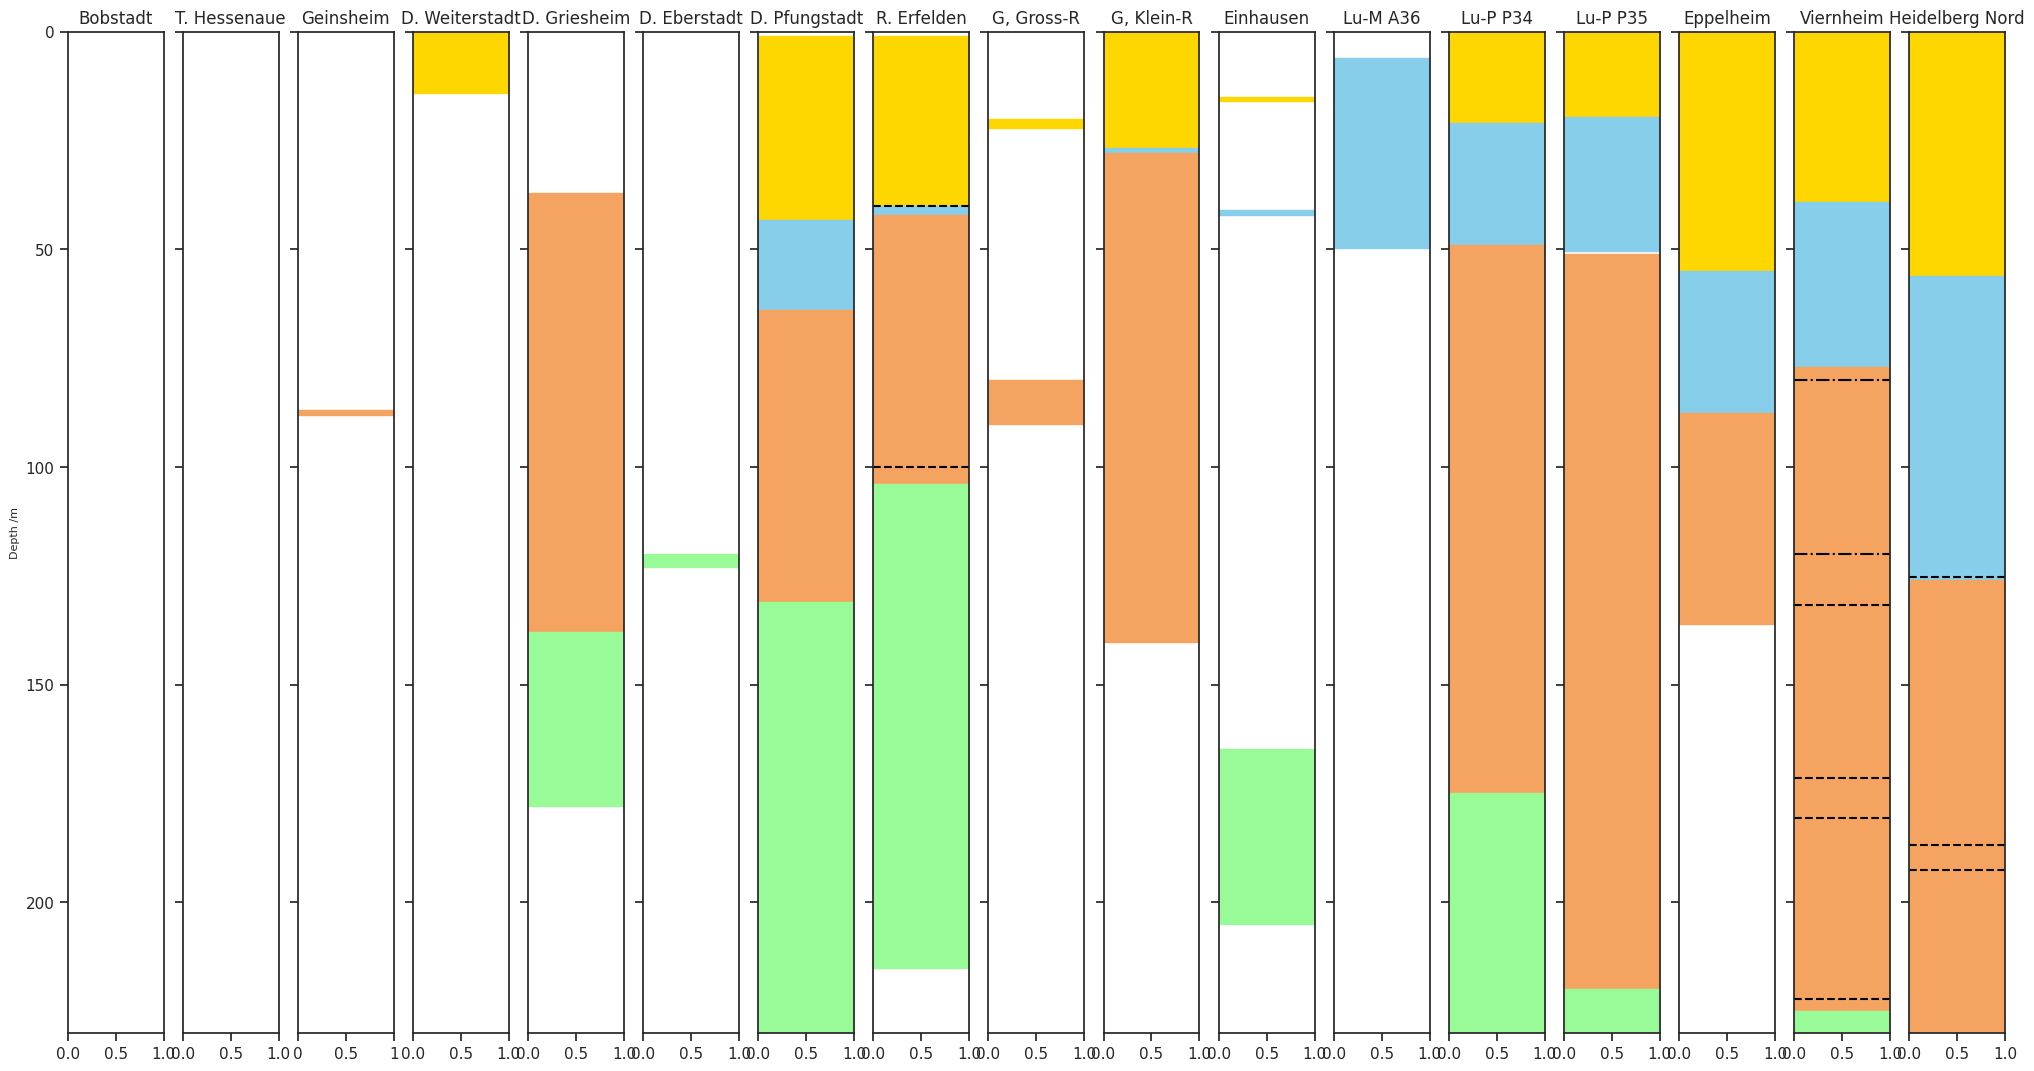

In [332]:


#plotting Viernheim vs new cores
rows = 1
cols = 17
fig, ax = plt.subplots(nrows=rows, ncols= cols, figsize = (25,13), sharey =True)


plt.style.use('fast')
plt.ylim([0, 230])

#ax[0] is for Bobstadt
#ax[0].set_xlabel("Val D/L THAA", fontsize=8)
ax[0].set_ylabel("Depth /m", fontsize=8)
ax[0].set(xlabel=None)
ax[0].set_xlim(0,1)
ax[0].set_title("Bobstadt")

#ax[1] is for Trebur Hessenaue
ax[1].set(xlabel=None)
ax[1].set_xlim(0,1)
ax[1].set_title("T. Hessenaue")

#ax[2] is for Geinsheim
ax[2].axhspan(87, 88, alpha=1, color='sandybrown')
ax[2].set(xlabel=None)
ax[2].set_xticks([0,0.5,1], ['0', '0.5', '1'])
ax[2].set_xlim(0,1)
ax[2].set_title("Geinsheim")

#ax[3] is for Darmstadt Weiterstadt
ax[3].axhspan(0, 14, alpha=1, color='gold')
ax[3].set(xlabel=None)
ax[3].set_xlim(0,1)
ax[3].set_title("D. Weiterstadt")

#ax[4] is for Darmstadt Griesheim
ax[4].axhspan(37, 138, alpha=1, color='sandybrown')
ax[4].axhspan(138, 178, alpha=1, color='palegreen')
ax[4].set(xlabel=None)
ax[4].set_xlim(0,1)
ax[4].set_xlim(0,1)
ax[4].set_title("D. Griesheim")

#ax[5] is for Darmstadt Eberstadt
ax[5].axhspan(120, 123, alpha=1, color='palegreen')
ax[5].set(xlabel=None)
ax[5].set_xlim(0,1)
ax[5].set_title("D. Eberstadt")

#ax[6] is for Darmstadt Pfungstadt
ax[6].axhspan(1.05, 43.2, alpha=1, color='gold')
ax[6].axhspan(43.2, 63.9, alpha=1, color='skyblue')
ax[6].axhspan(63.9, 131, alpha=1, color='sandybrown')
ax[6].axhspan(131, 250, alpha=1, color='palegreen')
ax[6].set(xlabel=None)
ax[6].set_xlim(0,1)
ax[6].set_title("D. Pfungstadt")

#Riedstadt Erfelden
ax[7].axhspan(0, 0.9, alpha=1, color='white')
ax[7].axhspan(0.9, 40, alpha=1, color='gold')
ax[7].axhspan(40, 42, alpha=1, color='skyblue')
ax[7].axhspan(42, 104, alpha=1, color='sandybrown')
ax[7].axhspan(104, 215, alpha=1, color='palegreen')
ax[7].axhline(y=40, color='black', alpha=1, c='black', linestyle="--") # B/M boundary
ax[7].axhline(y=100, color='black', alpha=1, c='black', linestyle="--") #M/G boundary
ax[7].set(xlabel=None)
ax[7].set_xlim(0,1)
ax[7].set_title("R. Erfelden")

#Gernsheim Gross Rohrheim
ax[8].axhspan(20, 22, alpha=1, color='gold')
ax[8].axhspan(80, 90, alpha=1, color='sandybrown')
ax[8].set(xlabel=None)
ax[8].set_xlim(0,1)
ax[8].set_title("G, Gross-R")

#ax[9] will be G, Klein-R
ax[9].axhspan(0.1, 26.65, alpha=1, color='gold')
ax[9].axhspan(26.65, 27.8, alpha=1, color='skyblue')
ax[9].axhspan(27.8, 140.15, alpha=1, color='sandybrown')
ax[9].axhspan(140.15, 147,75, alpha=1, color='palegreen')
ax[9].set(xlabel=None)
ax[9].set_xlim(0,1)
ax[9].set_title("G, Klein-R")

#ax[10] is for Einhausen
ax[10].axhspan(15, 16, alpha=1, color='gold')
ax[10].axhspan(41, 42, alpha=1, color='skyblue')
ax[10].axhspan(164.8, 205, alpha=1, color='palegreen')
ax[10].set(xlabel=None)
ax[10].set_xlim(0,1)
ax[10].set_title("Einhausen")

#Lu-M A36
ax[11].axhspan(6, 49.6, alpha=1, color='skyblue')
ax[11].set(xlabel=None)
ax[11].set_xlim(0,1)
ax[11].set_title("Lu-M A36")

#Lu-P P34
for i in range(len(form_top_p34)):
  ax[12].axhspan(form_top_p34[i], form_bot_p34[i], alpha=1, color=form_color[i])
ax[12].set(xlabel=None)
ax[12].set_xlim(0,1)
ax[12].set_title("Lu-P P34")

#Lu-P P35
ax[13].axhspan(0, 19.5, alpha=1, color='gold')
ax[13].axhspan(19.5, 50.3, alpha=1, color='skyblue')
ax[13].axhspan(51, 220, alpha=1, color='sandybrown')
ax[13].axhspan(220, 300, alpha=1, color='palegreen')
ax[13].set(xlabel=None)
ax[13].set_xlim(0,1)
ax[13].set_title("Lu-P P35")

#ax[14] for Eppelheim
ax[14].axhspan(0, 55, alpha=1, color='gold')
ax[14].axhspan(55, 87.5, alpha=1, color='skyblue')
ax[14].axhspan(87.5, 136, alpha=1, color='sandybrown')
ax[14].set(xlabel=None)
ax[14].set_title("Eppelheim")
ax[14].set_xlim(0,1)


#ax[15] will be the formations in Viernheim borehole
for i in range(len(form_top_vie)):
  ax[15].axhspan(form_top_vie[i], form_bot_vie[i], alpha=1, color=form_color[i])
ax[15].set(xlabel=None)
#paleomagnetism measurements
ax[15].axhline(y=80, color='black', alpha=1, c='black', linestyle="-.")
ax[15].axhline(y=120, color='black', alpha=1, c='black', linestyle="-.")
ax[15].axhline(y=131.7, color='black', alpha=1, c='black', linestyle="--") # bottom of Jaramillo
ax[15].axhline(y=171.46, color='black', alpha=1, c='black', linestyle="--") #top of olduvai
ax[15].axhline(y=180.53, color='black', alpha=1, c='black', linestyle="--") #bottom of olduvai
ax[15].axhline(y=222.12, color='black', alpha=1, c='black', linestyle="--") #G/M
ax[15].set_title("Viernheim")
ax[15].set_xlim(0,1)

#ax[16] will be the formations in Heidelberg Nord borehole for comparison
ax[16].axhspan(0, 56, alpha=1, color='gold')
ax[16].axhspan(56, 126, alpha=1, color='skyblue')
ax[16].axhspan(126, 299, alpha=1, color='sandybrown')
#paleomagnetism measurements
ax[16].axhline(y=125.18, color='black', alpha=1, c='black', linestyle="--") #B/M
ax[16].axhline(y=186.75, color='black', alpha=1, c='black', linestyle="--") #M/J
ax[16].axhline(y=192.52, color='black', alpha=1, c='black', linestyle="--") #J/M
ax[16].axhline(y=247.97, color='black', alpha=1, c='black', linestyle="--") #M/O
ax[16].set_title("Heidelberg Nord")
ax[16].set_xlim(0,1)
ax[16].set(xlabel=None)

#to flip the y axis so smallest value is at the top write:
plt.gca().invert_yaxis()


In [333]:
### define colour palettes for all plots
palette_borehole = {'Bobstadt': '#769958', 'Trebur-Hessenaue': '#0343df', 'L-Parkinsel P34': '#e50000', 'Einhausen': '#7e1e9c', "Heilbronn-Bockingen":"#ffb07c", 'Weiterstadt': '#d1b26f', 'Klein-Rohrheim' : '#380282',
           'M-Lindenhof': '#75bbfd', 'L-Maudach A36' : '#f97306', 'Eppelheim' : '#929591', 'L-Parkinsel P35': '#c20078', 'Riedstadt-Erfelden' : '#653700', "Nordheim" : '#516572',
           'Pfungstadt' : '#01ff07', 'Viernheim' : '#ff81c0', 'Geinsheim' : '#cf6275', 'Groß-Rohrheim' : '#06470c', 'D-Eberstadt' : '#014d4e', 'Griesheim' : '#bc13fe'}



Importing non-outlying data into the script

In [334]:
#importing csv files without outlier data
FAA_CSV = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EQuaTe data/Germany/HeidelbergBasin/HB_frees_closedsystemonly.csv", sep=',', encoding='latin-1')
THAA_CSV = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EQuaTe data/Germany/HeidelbergBasin/HB_hyds_closedsystemonly.csv", sep=',', encoding='latin-1')

THAA_CSV.head(15)

,Sample name,NEaarNo,location,Quaternary sites,relative,Horizon,Depth,Age_category,Stratigraphy,Lithology,...,[L-Thr].1,[L-His].1,[Gly].1,[Arg].1,[Ala].1,[Tyr].1,[Val].1,[Phe].1,[Leu].1,[Ile].1
0,E24-6 GBobBto1,17565bF,"6016 Hessenaue Profil B, DamHes; 1.30-1.55m",Bobstadt,Germany,Bobstadt 1.30-1.55 m,1.375,"Holocene, early boreal",Mannheim,Mannheim,...,0.041856815,0.018443283,0.128869979,0.027696185,0.135718712,0.011528044,0.043045819,0.021644922,0.067803829,0.010901356
1,E24-6 GBobBto1,17565bF,"6016 Hessenaue Profil B, DamHes; 1.30-1.55m",Bobstadt,Germany,Bobstadt 1.30-1.55 m,1.375,"Holocene, early boreal",Mannheim,Mannheim,...,0.046240226,0.011600063,0.105819199,0.028894009,0.146549245,0.009959313,0.047225268,0.020614303,0.068484372,0.016118678
2,E24-6 GBobBto2,17566bF,"6016 Hessenaue Profil B, DamHes; 1.30-1.55m",Bobstadt,Germany,Bobstadt 1.30-1.55 m,1.375,"Holocene, early boreal",Mannheim,Mannheim,...,0.048803581,0.013649378,0.232403465,0.037662288,0.111467238,0.002474644,0.066973941,0.02894231,0.076069931,0.026117104
3,E24-6 GBobBto2,17566bF,"6016 Hessenaue Profil B, DamHes; 1.30-1.55m",Bobstadt,Germany,Bobstadt 1.30-1.55 m,1.375,"Holocene, early boreal",Mannheim,Mannheim,...,0.060236325,0.007548237,0.101084906,0.043198461,0.131265377,0.002572025,0.086193114,0.033893202,0.092022807,0.036191297
4,E24-6 GBobBto3,17567bF,"6016 Hessenaue Profil B, DamHes; 1.30-1.55m",Bobstadt,Germany,Bobstadt 1.30-1.55 m,1.375,"Holocene, early boreal",Mannheim,Mannheim,...,0.057093689,0.011930572,0.215704564,0.041028756,0.121093229,0.00142242,0.080568803,0.032827884,0.092416293,0.034317068
5,E24-6 GBobBto3,17567bF,"6016 Hessenaue Profil B, DamHes; 1.30-1.55m",Bobstadt,Germany,Bobstadt 1.30-1.55 m,1.375,"Holocene, early boreal",Mannheim,Mannheim,...,0.067898833,0.006850827,0.078382569,0.044423315,0.137923271,0.002247719,0.099237558,0.036905641,0.105845802,0.043839284
6,E24-4 GTH1.3Bto1,17205bH*,"6019 Hessenaue Profil B DemHes; 1.30-1.35 m, H...",Trebur-Hessenaue,Germany,Trebur-Hessenaue 1.30-1.35 m,1.325,"Holocene, pre-boreal",Mannheim,Mannheim,...,0.055575162,0.011344139,0.20042604,0.040685802,0.109062038,0.006921361,0.070989886,0.030503442,0.084493132,0.03273257
7,E24-4 GTH1.3Bto1,17205bH*,"6019 Hessenaue Profil B DemHes; 1.30-1.35 m, H...",Trebur-Hessenaue,Germany,Trebur-Hessenaue 1.30-1.35 m,1.325,"Holocene, pre-boreal",Mannheim,Mannheim,...,0.057744034,0.009545827,0.18827447,0.03929107,0.104952309,0.003505072,0.073641421,0.030247211,0.100710082,0.035311891
8,E24-4 GTH1.3Bto2,17206bH*,"6019 Hessenaue Profil B DemHes; 1.30-1.35 m, H...",Trebur-Hessenaue,Germany,Trebur-Hessenaue 1.30-1.35 m,1.325,"Holocene, pre-boreal",Mannheim,Mannheim,...,0.044638538,0.013404623,0.233905698,0.039258591,0.11817886,0.017437917,0.061473897,0.028960271,0.069550476,0.022462824
9,E24-4 GTH1.3Bto2,17206bH*,"6019 Hessenaue Profil B DemHes; 1.30-1.35 m, H...",Trebur-Hessenaue,Germany,Trebur-Hessenaue 1.30-1.35 m,1.325,"Holocene, pre-boreal",Mannheim,Mannheim,...,0.048834019,0.012218738,0.228482795,0.034695436,0.107099423,0.002433489,0.064220556,0.029595793,0.077946777,0.024727001


Code to create D/Ls versus depth plots in figure 4

In [335]:
#remove rows with 0s in
# Remove rows where the specified column equals 0
FAA_CSV_ALAnan = FAA_CSV[FAA_CSV["Ala D/L"] != 0]
THAA_CSV_ALAnan = THAA_CSV[THAA_CSV["Ala D/L"] != 0]

FAA_CSV_GLXnan = FAA_CSV[FAA_CSV["Glx D/L"] != 0]
THAA_CSV_GLXnan = THAA_CSV[THAA_CSV["Glx D/L"] != 0]

FAA_CSV_VALnan = FAA_CSV[FAA_CSV["Val D/L"] != 0]
THAA_CSV_VALnan = THAA_CSV[THAA_CSV["Val D/L"] != 0]

FAA_CSV_ASXnan = FAA_CSV[FAA_CSV["Asx D/L"] != 0]
THAA_CSV_ASXnan = THAA_CSV[THAA_CSV["Asx D/L"] != 0]

In [336]:

#function to calculate two stds
def double_std(array):
 return np.std(array) * 2


#function to calculate horizon mean for each sample
def mean_sd(df_FAA, df_THAA):
  df_FAA_mean = df_FAA.groupby(['Horizon'], as_index=False).agg(
                      {'Asx D/L':['mean', 'std'],'Glx D/L':['mean', 'std'], 'Ala D/L':['mean', 'std'], 'Val D/L':['mean', 'std'], "Quaternary sites": 'first', 'Lithology': 'first', 'Depth': 'first'})

  df_FAA_mean.columns = ["Horizon", "Asx D/L mean", "Asx D/L std", "Glx D/L mean", "Glx D/L std",
                       "Ala D/L mean", "Ala D/L std", "Val D/L mean", "Val D/L std", "Quaternary sites", 'Stratigraphy', 'Depth']

  df_THAA_mean = df_THAA.groupby(['Horizon'], as_index=False).agg(
                      {'Asx D/L':['mean', 'std'],'Glx D/L':['mean', 'std'], 'Ala D/L':['mean', 'std'], 'Val D/L':['mean', 'std'], "Quaternary sites": 'first', 'Lithology': 'first', 'Depth': 'first'})

  df_THAA_mean.columns = ["Horizon", "Asx D/L mean", "Asx D/L std", "Glx D/L mean", "Glx D/L std",
                       "Ala D/L mean", "Ala D/L std", "Val D/L mean", "Val D/L std", "Quaternary sites", 'Lithology', 'Depth']
  return df_FAA_mean, df_THAA_mean


FAA_ALA_MEAN, THAA_ALA_MEAN = mean_sd(FAA_CSV_ALAnan, THAA_CSV_ALAnan)
FAA_ASX_MEAN, THAA_ASX_MEAN = mean_sd(FAA_CSV_ASXnan, THAA_CSV_ASXnan)
FAA_GLX_MEAN, THAA_GLX_MEAN = mean_sd(FAA_CSV_GLXnan, THAA_CSV_GLXnan)
FAA_VAL_MEAN, THAA_VAL_MEAN = mean_sd(FAA_CSV_VALnan, THAA_CSV_VALnan)

THAA_ALA_MEAN[16:30]

,Horizon,Asx D/L mean,Asx D/L std,Glx D/L mean,Glx D/L std,Ala D/L mean,Ala D/L std,Val D/L mean,Val D/L std,Quaternary sites,Lithology,Depth
16,L-Maudach A36 23.1-23.4 m,0.777486,0.006925,0.389927,0.004659,0.640322,0.005569,0.353314,0.011189,L-Maudach A36,Ludwigshafen,23.35
17,L-Maudach A36 26.4-26.8 m,0.800064,0.016711,0.407717,0.020293,0.659586,0.033343,0.370605,0.038046,L-Maudach A36,Ludwigshafen,26.70
18,L-Maudach A36 27.5-28.0 m,0.780250,0.023885,0.412702,0.024265,0.655304,0.004046,0.361525,0.002253,L-Maudach A36,Ludwigshafen,27.75
19,L-Parkinsel P34 20.5-21 m,0.786668,0.017472,0.460962,0.012075,0.694256,0.044765,0.360187,0.005833,L-Parkinsel P34,Ludwigshafen,20.75
20,L-Parkinsel P35 21.9-30.3 m,0.781524,0.024531,0.459299,0.001991,0.634724,0.026942,0.355604,0.020917,L-Parkinsel P35,Ludwigshafen,26.10
21,L-Parkinsel P35 30.26-30.3 m,0.754365,0.017131,0.442281,0.007426,0.655132,0.014569,0.360593,0.007492,L-Parkinsel P35,Ludwigshafen,30.28
22,L-Parkinsel P35 50-50.3 m,0.832711,0.008155,0.519513,0.026551,0.734263,0.006806,0.448437,0.015256,L-Parkinsel P35,Ludwigshafen,50.15
23,M-Lindenhof P18 29.5-30 m,0.733404,0.006391,0.415357,0.021028,0.603480,0.023040,0.339902,0.038053,M-Lindenhof,Ludwigshafen,29.75
24,M-Lindenhof P19 33 m,0.755944,0.022230,0.449965,0.022865,0.653776,0.029408,0.366877,0.032370,M-Lindenhof,Ludwigshafen,33.00
25,Pfungstadt 92.2 m,0.884214,0.007118,0.732442,0.019703,0.897107,0.011631,0.647572,0.011579,Pfungstadt,Viernheim,92.20


In [337]:
#defining function for plots
def depth_plot(df, AA, ax, legend, fraction):
    sns.set(style="ticks")

   # formation_dict = {
    #    'Mannheim': 'o',
     #   'Ludwigshafen': ['^', 'v', '>', '<'],
      #  'Viernheim' : ['p', 's', 'h', 'o'],
       # 'OZH': 's'
        #}
    marker_list = ['s', '*', '^', 'X', 'v', 'd', 'p', 'o', '>', 'H', 'P', '<', 'D', '>', 'h']
    #defining amino acid columns to be used
    AA_colnames = [col for col in df.columns if str(AA) + " D/L" in col]
    AA_mean = AA_colnames[0] # mean AA
    AA_sd = AA_colnames[1] # std AA
    x=df["Depth"] #xerr point
    y=AA_mean # yerr point
    ax.errorbar(df["Depth"], df[AA_mean], yerr= df[AA_sd], linestyle='None', color='Black', elinewidth=0.5, capsize=0.5, zorder=1) # plotting error

    if AA == "Val":
      # Create scatter plot
      # Map category values to marker styles
      # Define marker dictionary
      # Track plotted categories
      plotted_marker_categories = set()
      plotted_color_categories = set()

      # Create scatter plot
      for color_category, x, y in zip(df['Quaternary sites'], x, df[AA_mean]):
          if color_category not in plotted_color_categories:
            ax.scatter(x, y, color=palette_borehole[color_category], label=f'{color_category}')
            plotted_color_categories.add(color_category)
          else:
            ax.scatter(x, y, color=palette_borehole[color_category])
      # Add legend
      #desired_order = ['Vészto', 'Dévaványa', 'Szarvas', 'Mindszent', 'Jászladány', 'Kevermes', 'Pusztaottlaka'] #order of labels in legend

      handles, labels = ax.get_legend_handles_labels()
     # ordered_handles = [handles[labels.index(label)] for label in desired_order]
     # ordered_labels = ["Vésztő", "Dévaványa", 'Szarvas', 'Mindszent', 'Jászladány', 'Kevermes', 'Pusztaottlaka']

      ax.legend(handles=handles, labels=labels, loc='lower right', fontsize=11, bbox_to_anchor=(0.6, -0.45), ncols=4)
      ax.set_xlabel("Depth/ m")
      ax.set_ylabel(f'{fraction} {AA} D/L Value')
      ax.set_ylim(0,1.1)

      # Show plot
      plt.show()
    else:
          # Create scatter plot
      # Map category values to marker styles
      # Define marker dictionary
      # Track plotted categories
      plotted_marker_categories = set()
      plotted_color_categories = set()

      # Create scatter plot
      for color_category, x, y in zip(df['Quaternary sites'], x, df[AA_mean]):
          if color_category not in plotted_color_categories:
            ax.scatter(x, y, color=palette_borehole[color_category])
            #plotted_marker_categories.add(marker_category)
            plotted_color_categories.add(color_category)
          else:
            ax.scatter(x, y, color=palette_borehole[color_category])


      ax.set_xlabel("Depth/ m")
      ax.set_ylabel(f'{fraction} {AA} D/L Value')

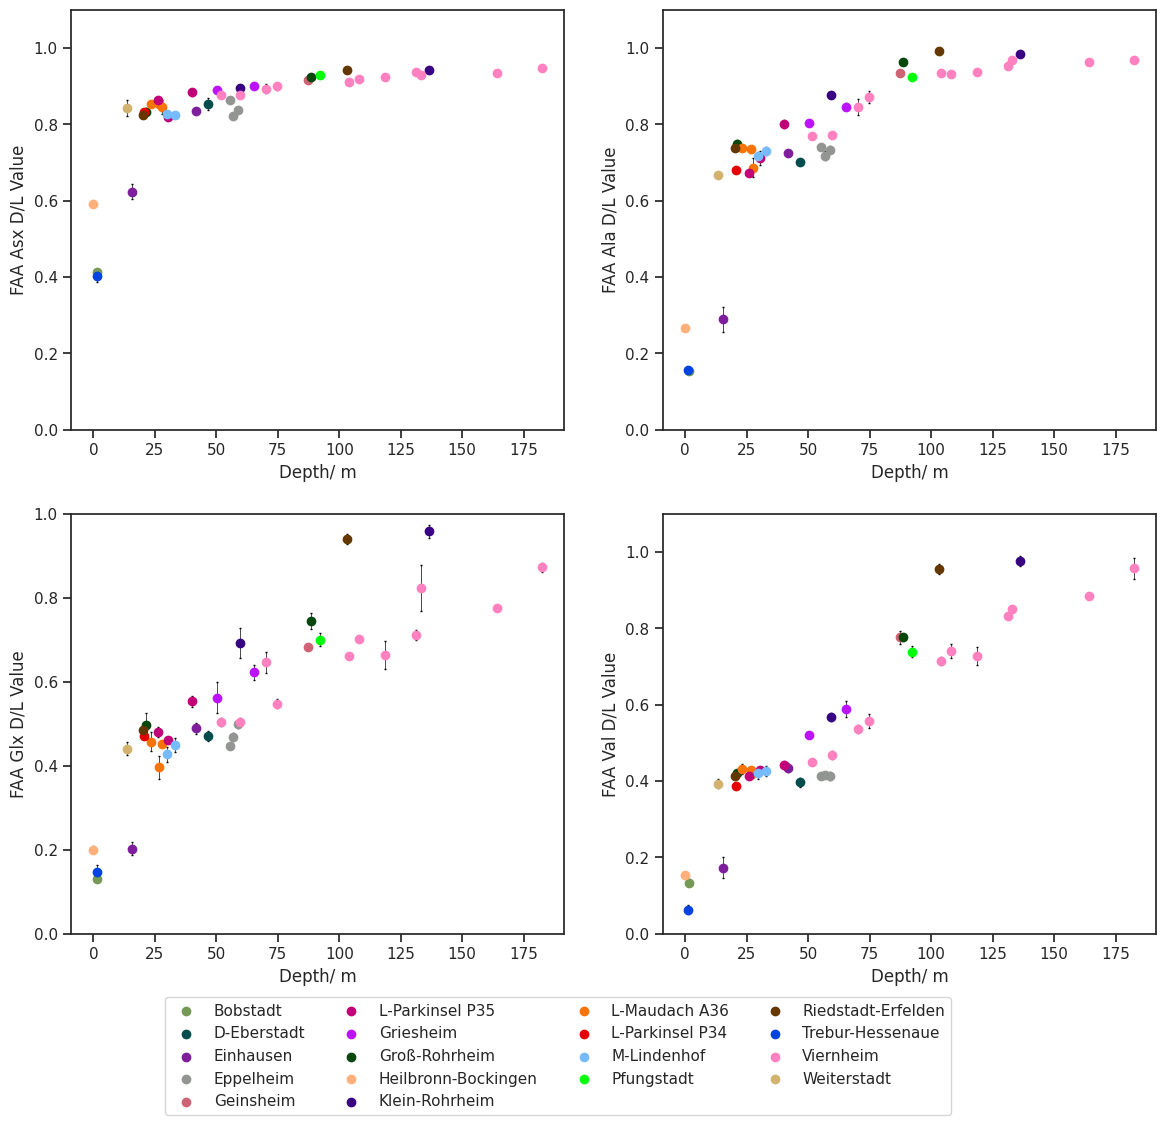

(0.0, 1.0)

In [338]:
#plotting depth vs. THAA D/L
rows = 2
cols = 2
fig, ax = plt.subplots(nrows=rows, ncols= cols, figsize = (14,12))

depth_plot(FAA_ASX_MEAN, "Asx", ax[0,0], False, 'FAA')
ax[0,0].set_ylim(0,1.1)
depth_plot(FAA_ALA_MEAN, "Ala", ax[0,1], False, 'FAA')
ax[0,1].set_ylim(0,1.1)
depth_plot(FAA_GLX_MEAN, "Glx", ax[1,0], False, 'FAA')
ax[1,0].set_ylim(0,1)
depth_plot(FAA_VAL_MEAN, "Val", ax[1,1], True, 'FAA')
ax[1,1].set_ylim(0,1)


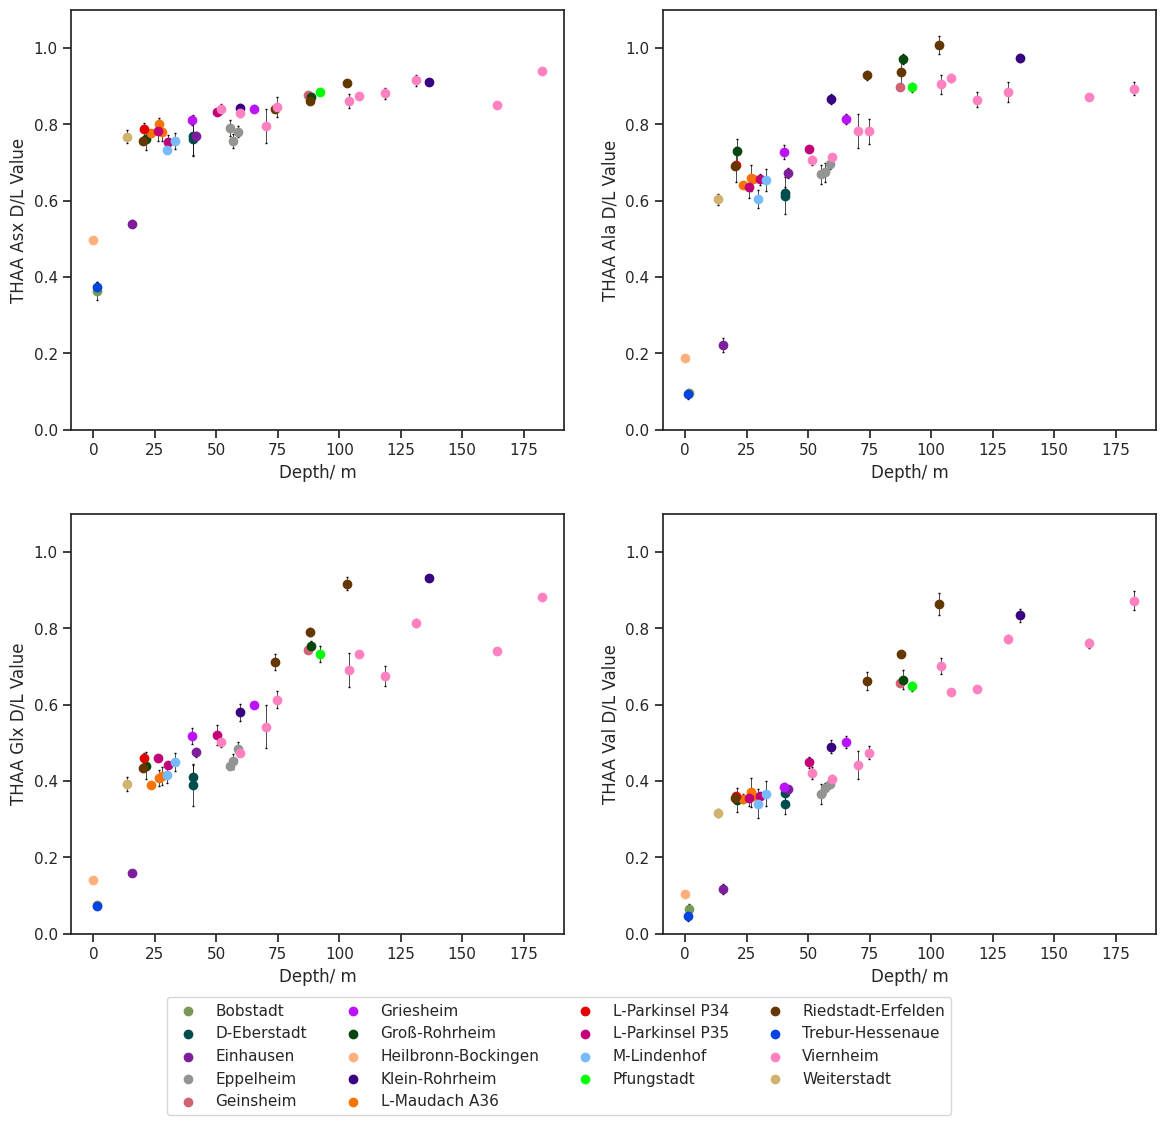

(0.0, 1.1)

In [339]:
#plotting depth vs. THAA D/L


rows = 2
cols = 2
fig, ax = plt.subplots(nrows=rows, ncols= cols, figsize = (14,12))


depth_plot(THAA_ASX_MEAN, "Asx", ax[0,0], False, 'THAA')
ax[0,0].set_ylim(0,1.1)
depth_plot(THAA_ALA_MEAN, "Ala", ax[0,1], False, 'THAA')
ax[0,1].set_ylim(0,1.1)
depth_plot(THAA_GLX_MEAN, "Glx", ax[1,0], False, 'THAA')
ax[1,0].set_ylim(0,1.1)
depth_plot(THAA_VAL_MEAN, "Val", ax[1,1], True, 'THAA')
ax[1,1].set_ylim(0,1.1)

In [340]:
#function to create second dataframe with just the site you want to highlight

def sel_horizon(df, site):
    df_site = df.loc[df['Horizon'].isin(site)]
    return df_site


#function to create second dataframe with just the site you want to highlight

def sel_age(df, site):
    df_site = df.loc[df['Stratigraphy'].isin(site)]
    return df_site


#function to create second dataframe with just the site you want to highlight

def sel_formation(df, site):
    df_site = df.loc[df['Lithology'].isin(site)]
    return df_site



Script to create cross plots used in figure 5 and in the SI

In [341]:
FAA_CSV = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EQuaTe data/Germany/HeidelbergBasin/HB_frees_closedsystemonly.csv", sep=',', encoding='latin-1')
THAA_CSV = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EQuaTe data/Germany/HeidelbergBasin/HB_hyds_closedsystemonly.csv", sep=',', encoding='latin-1')

FAA_CSV = FAA_CSV.add_suffix("_FAA")
THAA_CSV = THAA_CSV.add_suffix("_THAA")
THAA_values = THAA_CSV.loc[:, 'Asx D/L_THAA':]
FAA_THAA = pd.concat([FAA_CSV, THAA_values], axis=1)
columns = list(FAA_THAA.columns)


In [342]:
FAA_THAA = FAA_THAA.groupby(['Sample name_FAA'], as_index=False).agg(
                      {'Asx D/L_FAA':['mean', 'std'],'Glx D/L_FAA':['mean', 'std'], 'Ala D/L_FAA':['mean', 'std'], 'Val D/L_FAA':['mean', 'std'],
                       'Asx D/L_THAA':['mean', 'std'],'Glx D/L_THAA':['mean', 'std'], 'Ala D/L_THAA':['mean', 'std'], 'Val D/L_THAA':['mean', 'std'],
                       "Quaternary sites_FAA": 'first', "Horizon_FAA" : "first", "Depth_FAA" : "first", "Age_category_FAA" : "first",
                       "Lithology_FAA" : "first","Age rank_FAA" : "first"})

FAA_THAA.columns = ["Sample name", "Asx D/L mean_FAA", "Asx D/L std_FAA", "Glx D/L mean_FAA", "Glx D/L std_FAA",
                          "Ala D/L mean_FAA", "Ala D/L std_FAA", "Val D/L mean_FAA", "Val D/L std_FAA",
                          "Asx D/L mean_THAA", "Asx D/L std_THAA", "Glx D/L mean_THAA", "Glx D/L std_THAA",
                          "Ala D/L mean_THAA", "Ala D/L std_THAA", "Val D/L mean_THAA", "Val D/L std_THAA",
                          "Quaternary sites_FAA", 'Horizon_FAA', 'Depth_FAA', 'Age_category_FAA', 'Lithology_FAA', 'Age rank_FAA']

In [343]:
markers = ['P', 'o', 'p', 'v', '*', '^', 'h', '<',  'd', '8', '>', 'P', 's', 'H', 'D', 'X', (6,1,0),
           'o', 'p', 'v', '*', (6,1,0), 'h', '<',  'd', 's', '>', 'P', 's', 'H', 'D', 'X', 'v',
           'o', 'D', 'v', 'o', '^', 'P', '<',  'd', "X", (6,1,0)]

/tmp/ipython-input-344-618660781.py:21: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.scatterplot(ax=ax[0], x=FAA_THAA["Ala D/L mean_FAA"], y=FAA_THAA["Ala D/L mean_THAA"],
/tmp/ipython-input-344-618660781.py:21: UserWarning: The markers list has more values (43) than needed (3), which may not be intended.
  sns.scatterplot(ax=ax[0], x=FAA_THAA["Ala D/L mean_FAA"], y=FAA_THAA["Ala D/L mean_THAA"],
/tmp/ipython-input-344-618660781.py:31: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.scatterplot(ax=ax[1], x=FAA_THAA["Val D/L mean_FAA"], y=FAA_THAA["Val D/L mean_THAA"],
/tmp/ipython-input-344-618660781.py:31: UserWarning: The markers list has more values (43) than needed (3), which may not be intended.
  sns.scatterplot(ax=ax[1], x=FAA_THAA["Val D/L mean_FAA"], y=FAA_THAA["Val D/L mean_THAA"],


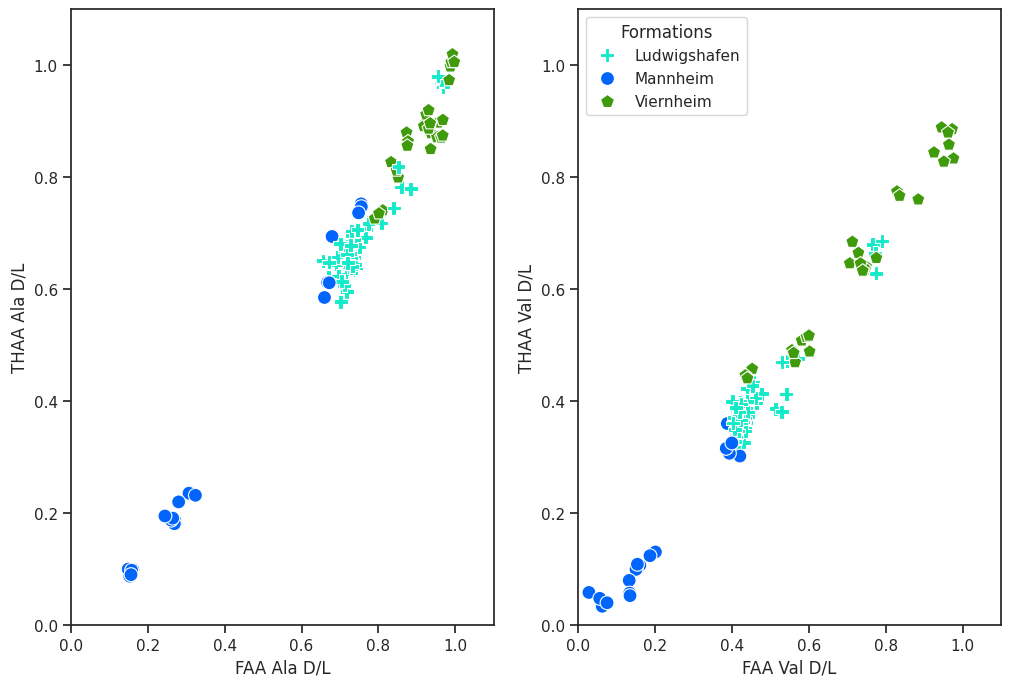

In [344]:
#cross plots

palette =[
    "#13eac9", #aqua
    "#0165fc", #bright blue
    "#3f9b0b", #grass green
    "#ff028d", #pink
    "#c1f80a", #charteuse
    "#fac205", #goldenrod
    "#f97306", #orange
    "#0504aa", #royal blue
    "#840000",
    "#ff028d",
    "#ad8150",
    "#000000"
    ]

fig,ax = plt.subplots(1, 2, figsize=(12, 8))

sns.set(style="ticks")
sns.scatterplot(ax=ax[0], x=FAA_THAA["Ala D/L mean_FAA"], y=FAA_THAA["Ala D/L mean_THAA"],
                         data=FAA_THAA, hue=FAA_THAA["Lithology_FAA"],
                         style=FAA_THAA["Lithology_FAA"],
                         markers=markers, s=100, palette=palette, legend=False)
ax[0].set_xlabel("FAA Ala D/L")
ax[0].set_ylabel("THAA Ala D/L")
ax[0].set_ylim(0,1.1)
ax[0].set_xlim(0,1.1)

sns.set(style="ticks")
sns.scatterplot(ax=ax[1], x=FAA_THAA["Val D/L mean_FAA"], y=FAA_THAA["Val D/L mean_THAA"],
                         data=FAA_THAA, hue=FAA_THAA["Lithology_FAA"],
                         style=FAA_THAA["Lithology_FAA"],
                         markers=markers, s=100, palette=palette, legend=True)
ax[1].set_xlabel("FAA Val D/L")
ax[1].set_ylabel("THAA Val D/L")
ax[1].set_ylim(0,1.1)
ax[1].set_xlim(0,1.1)


handles, labels = ax[1].get_legend_handles_labels()
desired_order = ['Mannheim', 'Ludwigshafen', 'Viernheim']
ordered_handles = [handles[labels.index(label)] for label in desired_order]
ordered_labels = ['Mannheim', 'Ludwigshafen', 'Viernheim']

ax[1].legend(loc="upper left", title="Formations")
plt.show()

In [345]:
FAA_THAA["Asx D/L mean_FAA"] = FAA_THAA["Asx D/L mean_FAA"].fillna(0)
FAA_THAA["Glx D/L mean_FAA"] = FAA_THAA["Glx D/L mean_FAA"].fillna(0)
FAA_THAA["Ala D/L mean_FAA"] = FAA_THAA["Ala D/L mean_FAA"].fillna(0)
FAA_THAA["Val D/L mean_FAA"] = FAA_THAA["Val D/L mean_FAA"].fillna(0)
FAA_THAA["Asx D/L mean_THAA"] = FAA_THAA["Asx D/L mean_THAA"].fillna(0)
FAA_THAA["Glx D/L mean_THAA"] = FAA_THAA["Glx D/L mean_THAA"].fillna(0)
FAA_THAA["Ala D/L mean_THAA"] = FAA_THAA["Ala D/L mean_THAA"].fillna(0)
FAA_THAA["Val D/L mean_THAA"] = FAA_THAA["Val D/L mean_THAA"].fillna(0)


/tmp/ipython-input-346-4041494554.py:6: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.scatterplot(ax=ax[0], x=FAA_THAA["Asx D/L mean_FAA"], y=FAA_THAA["Asx D/L mean_THAA"],
/tmp/ipython-input-346-4041494554.py:6: UserWarning: The markers list has more values (43) than needed (18), which may not be intended.
  sns.scatterplot(ax=ax[0], x=FAA_THAA["Asx D/L mean_FAA"], y=FAA_THAA["Asx D/L mean_THAA"],
/tmp/ipython-input-346-4041494554.py:16: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  sns.scatterplot(ax=ax[1], x=FAA_THAA["Glx D/L mean_FAA"], y=FAA_THAA["Glx D/L mean_THAA"],
/tmp/ipython-input-346-4041494554.py:16: UserWarning: The markers list has more values (43) than needed (18), which may not be intended.
  sns.scatterplot(ax=ax[1], x=FAA_THAA["Glx D/L mean_FAA"], y=FAA_THAA["Glx D/L mean_THAA"],


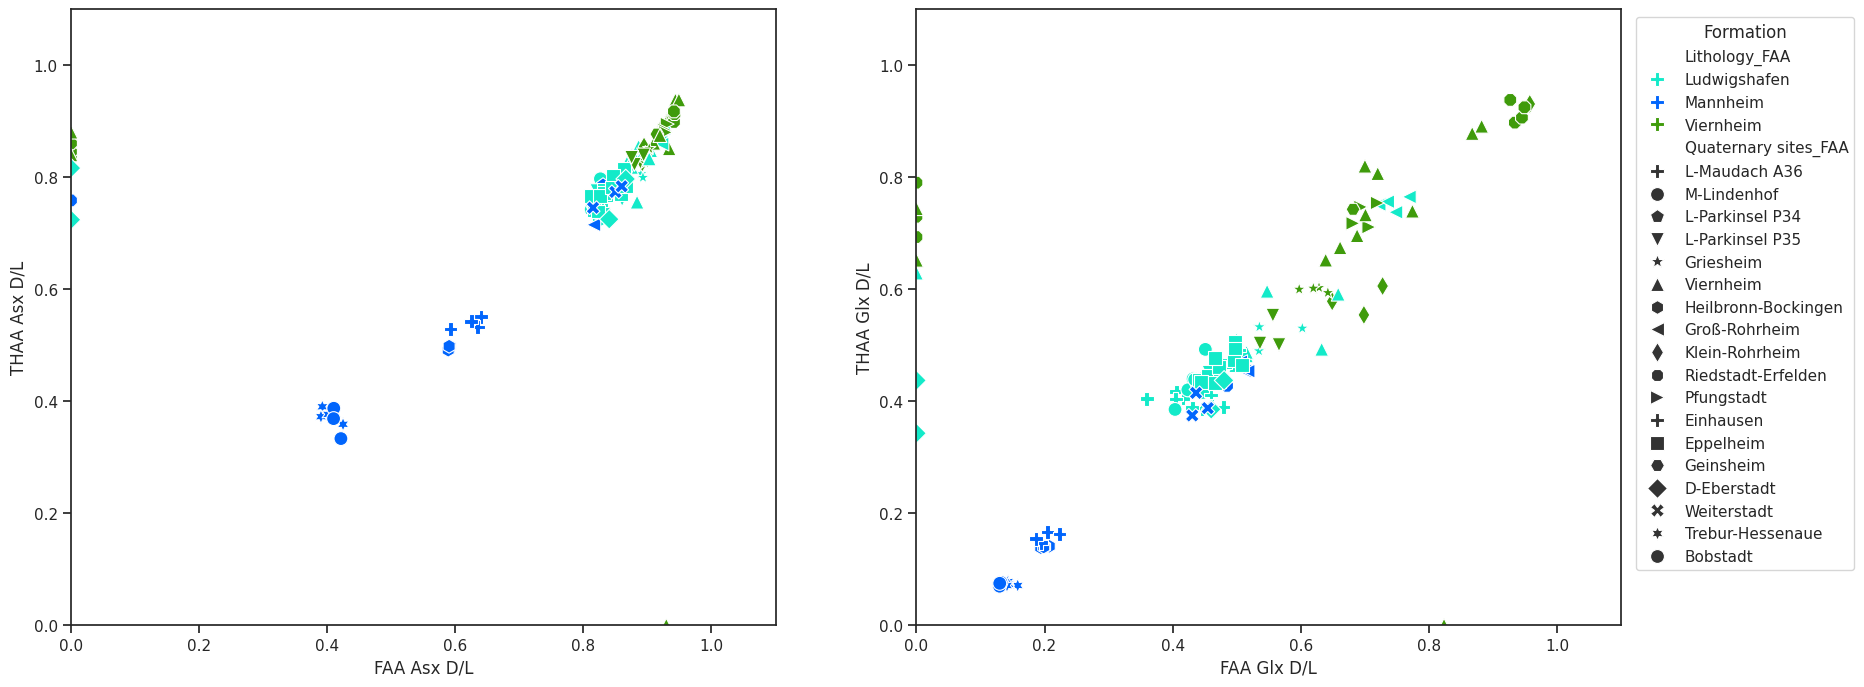

In [346]:
#cross plots

fig,ax = plt.subplots(1, 2, figsize=(20, 8))

sns.set(style="ticks")
sns.scatterplot(ax=ax[0], x=FAA_THAA["Asx D/L mean_FAA"], y=FAA_THAA["Asx D/L mean_THAA"],
                         data=FAA_THAA, hue=FAA_THAA["Lithology_FAA"],
                         style=FAA_THAA["Quaternary sites_FAA"],
                         markers=markers, s=100, palette=palette, legend=False)
ax[0].set_xlabel("FAA Asx D/L")
ax[0].set_ylabel("THAA Asx D/L")
ax[0].set_ylim(0,1.1)
ax[0].set_xlim(0,1.1)

sns.set(style="ticks")
sns.scatterplot(ax=ax[1], x=FAA_THAA["Glx D/L mean_FAA"], y=FAA_THAA["Glx D/L mean_THAA"],
                         data=FAA_THAA, hue=FAA_THAA["Lithology_FAA"],
                         style=FAA_THAA["Quaternary sites_FAA"],
                         markers=markers, s=100, palette=palette, legend=True)
ax[1].set_xlabel("FAA Glx D/L")
ax[1].set_ylabel("THAA Glx D/L")
ax[1].set_ylim(0,1.1)
ax[1].set_xlim(0,1.1)

# create a dictionary mapping the subscales to their color
handles, labels = ax[1].get_legend_handles_labels()
#index_depth_title = labels.index("Quaternary sites_FAA")
#color_dict = {label: handle.get_markerfacecolor()
#for handle, label in zip(handles[1:index_depth_title], labels[1:index_depth_title])}
# loop through the items, assign color via the subscale of the item idem
#for handle, label in zip(handles[index_depth_title + 1:], labels[index_depth_title + 1:]):
 # handle.set_markerfacecolor(color_dict[depth_to_site_dict[label]])
#create a legend only using the items
#legend1 = plt.legend(handles[index_depth_title + 1:], labels[index_depth_title + 1:], title='Site & Horizon',
 #                   loc="upper center", bbox_to_anchor=(0.5, -0.05), fontsize=10, ncol=5)

#legend = ax[1, 1].legend(handles[index_depth_title + 1:], labels[index_depth_title + 1:], loc='upper right', ncol=1,
         #                fontsize=8)
#legend.set_bbox_to_anchor((1.6, 2))  # Adjust the anchor point for the legend

#plt.show()
#print(index_depth_title)

#desired_order = [FAA_THAA["Quaternary sites_FAA"].unique()]
#handles, labels = ax[1].get_legend_handles_labels()
#ordered_handles = [handles[labels.index(label)] for label in desired_order]
#ordered_labels = ['0-0.4', '0.5-0.9', '1-1.9', '2-2.9', '3-3.9', '4-4.9', '>5']
#handles, labels = ax[1,1].get_legend_handles_labels()
#ordered_handles = [handles[labels.index(label)] for label in desired_order]
#ordered_labels = ['0-0.4', '0.5-0.9', '1-1.9', '2-2.9', '3-3.9', '4-4.9', '>5']
#ax[1,1].legend(handles=ordered_handles, labels=ordered_labels, loc='lower right', fontsize=10, bbox_to_anchor=(1.2, 0.5))
handles, labels = ax[1].get_legend_handles_labels()
plt.legend(title="Formation", bbox_to_anchor=(1.01, 1))
plt.show()

In [347]:
#transforming csv into pandas dataframe

EPD_FAA = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EQuaTe data/Germany/HeidelbergBasin/EPD_comp.xlsx", sheet_name='FAA')
EPD_THAA = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EQuaTe data/Germany/HeidelbergBasin/EPD_comp.xlsx", sheet_name='THAA')


FAA_EPD = EPD_FAA.add_suffix("_FAA")
#replacing NaN values with 0s to prevent code failure
#column numbers should match index for Asx D/L to Total column labels
for col in FAA_EPD.columns[9:]:
    FAA_EPD[col] = pd.to_numeric(FAA_EPD[col], errors="coerce")

FAA_EPD = FAA_EPD.replace(np.nan, 0.0, regex=True)

FAA_EPD.sort_values(by=['NEaarNo_FAA'], ascending=True)


THAA_EPD = EPD_THAA.add_suffix("_THAA")

for col in THAA_EPD.columns[14:25]:
    THAA_EPD[col] = pd.to_numeric(THAA_EPD[col], errors="coerce")

THAA_EPD = THAA_EPD.replace(np.nan, 0.0, regex=True)
FAA_EPD.columns

Index(['Sample name_FAA', 'NEaarNo_FAA', 'Genus_FAA', 'Species_FAA',
       'material_FAA', 'location_FAA', 'Quaternary sites_FAA',
       'Stratigraphy_FAA', 'SuspectedAge_FAA', 'Asx D/L_FAA', 'Glx D/L_FAA',
       'Ser D/L_FAA', 'Arg D/L_FAA', 'Ala D/L_FAA', 'Tyr D/L_FAA',
       'Val D/L_FAA', 'Phe D/L_FAA', 'Leu D/L_FAA', 'Ile D/L_FAA',
       '[Ser]/[Ala]_FAA'],
      dtype='object')

In [348]:
EPD_df = pd.DataFrame(data={
    'Quaternary_sites' : FAA_EPD['Quaternary sites_FAA'],
    'Stratigraphy' : FAA_EPD['Stratigraphy_FAA'],
    'SuspectedAge': FAA_EPD['SuspectedAge_FAA'],
    'Asx D/L_FAA' : FAA_EPD['Asx D/L_FAA'],
    'Ala D/L_FAA' : FAA_EPD['Ala D/L_FAA'],
    'Glx D/L_FAA' : FAA_EPD['Glx D/L_FAA'],
    'Val D/L_FAA' : FAA_EPD['Val D/L_FAA'],
    '[Ser]/[Ala]_FAA' : FAA_EPD['[Ser]/[Ala]_FAA'],
    'Asx D/L_THAA' : THAA_EPD['Asx D/L_THAA'],
    'Ala D/L_THAA' : THAA_EPD['Ala D/L_THAA'],
    'Glx D/L_THAA' : THAA_EPD['Glx D/L_THAA'],
    'Val D/L_THAA' : THAA_EPD['Val D/L_THAA'],
    '[Ser]/[Ala]_THAA' : THAA_EPD['[Ser]/[Ala]_THAA']
    })

EPD_df

,Quaternary_sites,Stratigraphy,SuspectedAge,Asx D/L_FAA,Ala D/L_FAA,Glx D/L_FAA,Val D/L_FAA,[Ser]/[Ala]_FAA,Asx D/L_THAA,Ala D/L_THAA,Glx D/L_THAA,Val D/L_THAA,[Ser]/[Ala]_THAA
0,Frechen,Brown coal Pit,Pliocene,0.961347,0.954517,1.106322,0.977942,0.006409,0.935201,0.932232,0.952178,0.883312,0.011277
1,Frechen,Brown coal Pit,Pliocene,0.957069,0.954931,1.119225,0.920028,0.006982,0.921981,0.901113,0.949137,0.948599,0.011186
2,Frechen,Brown coal Pit,Pliocene,0.957256,0.944435,0.918116,0.979955,0.010625,0.941520,0.939197,0.934743,0.908037,0.015592
3,Frechen,Brown coal Pit,Pliocene,0.955580,0.962289,0.920253,0.977990,0.012424,0.950975,0.933981,0.929199,0.936275,0.014306
4,Frechen,Brown coal Pit,Pliocene,0.946077,0.952980,0.816554,0.950381,0.009318,0.941579,0.933214,0.937262,0.904096,0.013318
5,Frechen,Brown coal Pit,Pliocene,0.945324,0.956948,0.858179,0.957680,0.010280,0.939156,0.934936,0.936085,0.908817,0.013745
6,Frechen,Brown coal Pit,Pliocene,0.943839,0.952005,0.831391,0.953618,0.010784,0.932636,0.935318,0.921852,0.904076,0.023593
7,Frechen,Brown coal Pit,Pliocene,0.939742,0.955140,0.884470,0.953271,0.012609,0.936327,0.931200,0.927776,0.905462,0.030542
8,Bavel,clay pit I,Bavelian,0.910044,0.877361,0.845860,0.624853,0.061285,0.846465,0.793546,0.635601,0.483076,0.081401
9,Bavel,clay pit I,Bavelian,0.908045,0.874436,0.737024,0.633733,0.059946,0.846360,0.772073,0.634171,0.494535,0.074693


In [349]:
def get_age(Age, df):
    age = df.loc[df['Quaternary_sites'].isin(Age)]
    return age

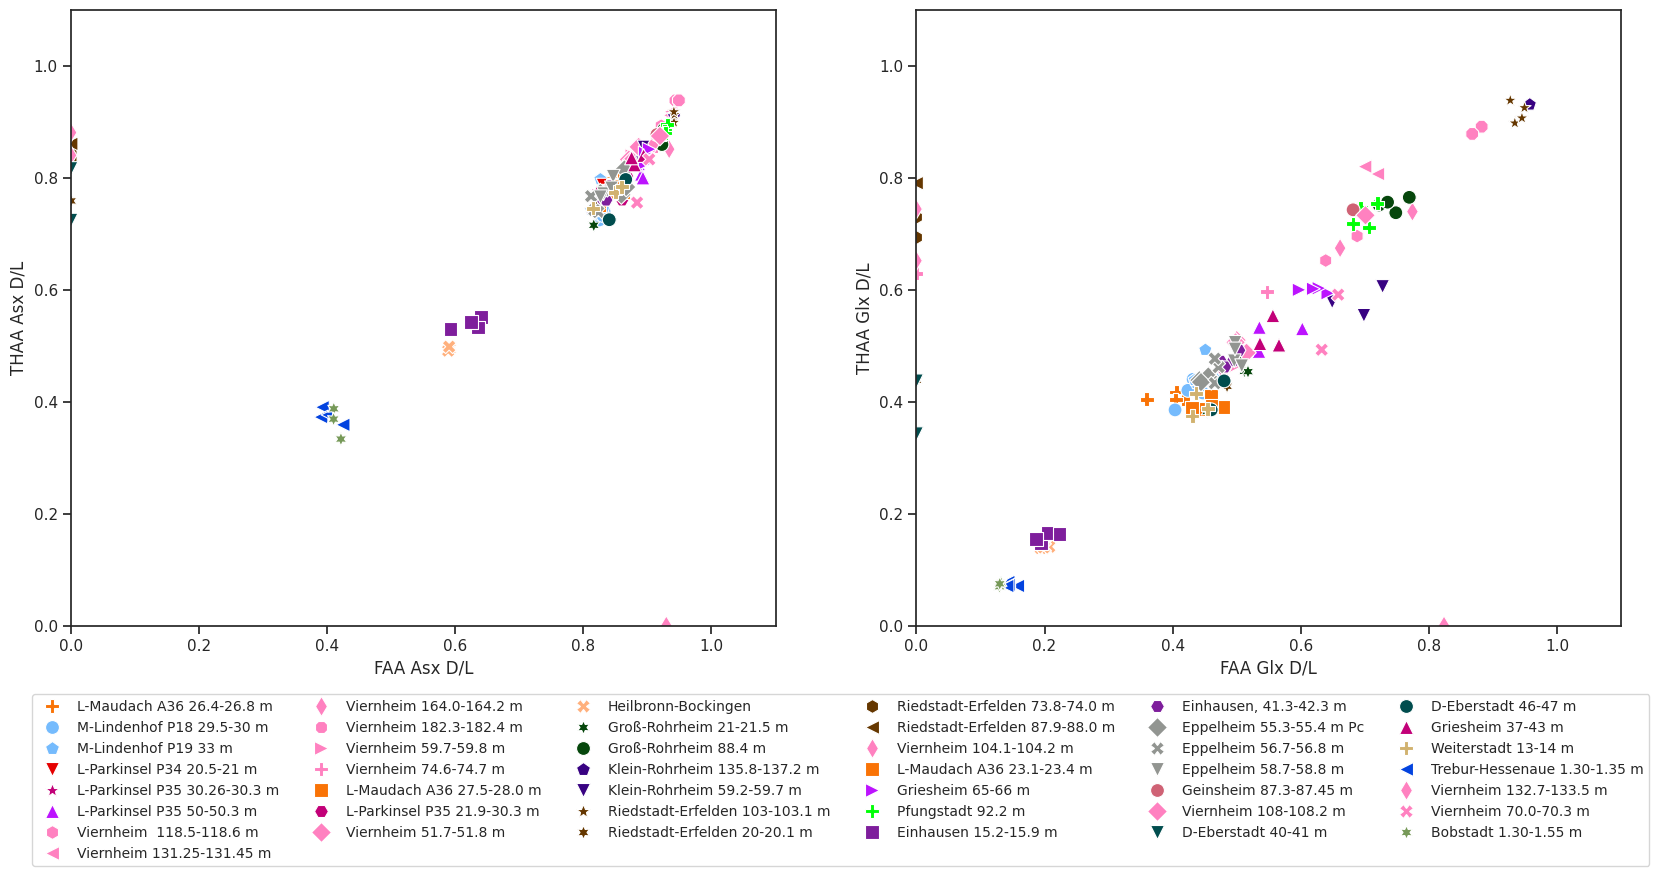

In [350]:

sns.set(style="ticks")
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.scatterplot(ax=ax[0], x=FAA_THAA["Asx D/L mean_FAA"], y=FAA_THAA["Asx D/L mean_THAA"],
                         data=FAA_THAA, hue=FAA_THAA["Quaternary sites_FAA"],
                         style=FAA_THAA["Horizon_FAA"],
                         markers=markers, s=100, palette=palette_borehole, legend=False)
ax[0].set_xlabel("FAA Asx D/L")
ax[0].set_ylabel("THAA Asx D/L")
ax[0].set_ylim(0,1.1)
ax[0].set_xlim(0,1.1)

sns.scatterplot(ax=ax[1], x=FAA_THAA["Glx D/L mean_FAA"], y=FAA_THAA["Glx D/L mean_THAA"],
                         data=FAA_THAA, hue=FAA_THAA["Quaternary sites_FAA"],
                         style=FAA_THAA["Horizon_FAA"],
                         markers=markers, s=100, palette=palette_borehole, legend=True)
ax[1].set_xlabel("FAA Glx D/L")
ax[1].set_ylabel("THAA Glx D/L")
ax[1].set_ylim(0,1.1)
ax[1].set_xlim(0,1.1)

depth_to_site_dict = FAA_THAA.set_index("Horizon_FAA")["Quaternary sites_FAA"].to_dict()

# create a dictionary mapping the subscales to their color
handles, labels = ax[1].get_legend_handles_labels()
index_depth_title = labels.index("Horizon_FAA")
color_dict = {label: handle.get_markerfacecolor()
for handle, label in zip(handles[1:index_depth_title], labels[1:index_depth_title])}
# loop through the items, assign color via the subscale of the item idem
for handle, label in zip(handles[index_depth_title + 1:], labels[index_depth_title + 1:]):
  handle.set_markerfacecolor(color_dict[depth_to_site_dict[label]])
#create a legend only using the items
#legend1 = plt.legend(handles[index_depth_title + 1:], labels[index_depth_title + 1:], title='Site & Horizon',
 #                   loc="upper center", bbox_to_anchor=(0.5, -0.05), fontsize=10, ncol=5)

legend = ax[1].legend(handles[index_depth_title + 1:], labels[index_depth_title + 1:], loc='upper right', ncol=1,
                         fontsize=10, ncols=6)
legend.set_bbox_to_anchor((1.05, -0.1))  # Adjust the anchor point for the legend

plt.show()

In [351]:
FAA_THAA_mean = FAA_THAA.groupby(['Horizon_FAA'], as_index=False).agg(
                      {"Quaternary sites_FAA": "first", "Age rank_FAA": "first",'Asx D/L mean_FAA':['mean', 'std'],'Glx D/L mean_FAA':['mean', 'std'], 'Ala D/L mean_FAA':['mean', 'std'],
                       'Val D/L mean_FAA':['mean', 'std'],'Asx D/L mean_THAA':['mean', 'std'],'Glx D/L mean_THAA':['mean', 'std'], 'Ala D/L mean_THAA':['mean', 'std'],
                       'Val D/L mean_THAA':['mean', 'std']})
FAA_THAA_mean.columns = ["Horizon_FAA", "Quaternary sites_FAA", "Age rank_FAA", "AsxFAAmean", "AsxFAAstd", "GlxFAAmean", "GlxFAAstd",
                         "AlaFAAmean", "AlaFAAstd", "ValFAAmean", "ValFAAstd", "AsxTHAAmean", "AsxTHAAstd", "GlxTHAAmean", "GlxTHAAstd",
                         "AlaTHAAmean", "AlaTHAAstd", "ValTHAAmean", "ValTHAAstd"]

FAA_THAA_mean = FAA_THAA_mean.sort_values(by=['Age rank_FAA','Horizon_FAA'], ascending=True)

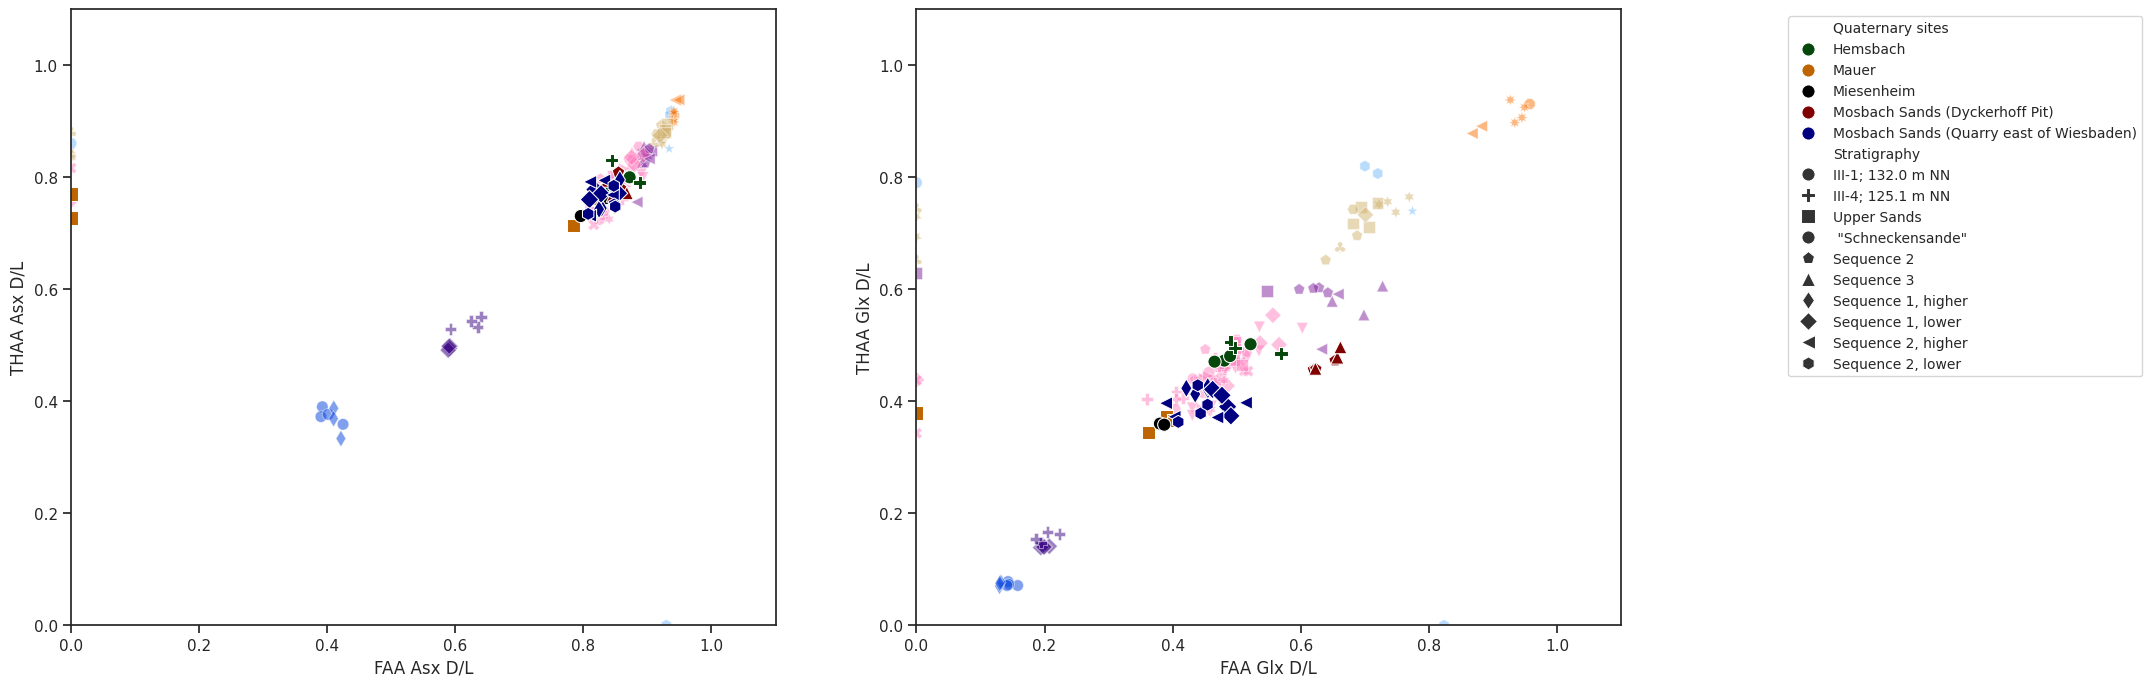

In [352]:
palette_ageclassification = {
    1.0: '#0343df', 2.0: '#380282', 3.0: '#ff81c0',
    4.0: '#7e1e9c', 5.0: '#d1b26f', 6.1: '#75bbfd', 6.2: '#f97306'
}

sns.set(style="ticks")
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# First scatter plot
sns.scatterplot(ax=ax[0], x="Asx D/L mean_FAA", y="Asx D/L mean_THAA",
                data=FAA_THAA, hue="Age rank_FAA",
                style="Horizon_FAA", markers=markers_age, s=70,
                palette=palette_ageclassification, legend=False, alpha=0.5, zorder=1)
sns.scatterplot(ax=ax[0], x="Asx D/L mean_FAA", y="Asx D/L mean_THAA",
                data=EMP_df, hue="Quaternary sites",
                style="Stratigraphy", markers=markers_EM, s=90,
                palette=palette_EMP, legend=False, zorder=2)

ax[0].set_xlabel("FAA Asx D/L")
ax[0].set_ylabel("THAA Asx D/L")
ax[0].set_ylim(0, 1.1)
ax[0].set_xlim(0, 1.1)

# Second scatter plot
sns.scatterplot(ax=ax[1], x="Glx D/L mean_FAA", y="Glx D/L mean_THAA",
                data=FAA_THAA, hue="Age rank_FAA",
                style="Horizon_FAA", markers=markers_age, s=70,
                palette=palette_ageclassification, legend=False, alpha=0.5)
sns.scatterplot(ax=ax[1], x="Glx D/L mean_FAA", y="Glx D/L mean_THAA",
                data=EMP_df, hue="Quaternary sites",
                style="Stratigraphy", markers=markers_EM, s=90,
                palette=palette_EMP, legend=True, zorder=2)
ax[1].set_xlabel("FAA Glx D/L")
ax[1].set_ylabel("THAA Glx D/L")
ax[1].set_ylim(0, 1.1)
ax[1].set_xlim(0, 1.1)

# Adjust legend to ensure colors are consistent
depth_to_site_dict = FAA_THAA.set_index("Horizon_FAA")["Age rank_FAA"].to_dict()

handles, labels = ax[1].get_legend_handles_labels()
color_dict = {str(label): palette_ageclassification[depth_to_site_dict[label]] for label in depth_to_site_dict}

# Update legend handles with correct colors
for handle, label in zip(handles, labels):
    if label in color_dict:
        handle.set_color(color_dict[label])
        handle.set_markerfacecolor(color_dict[label])

# Create the legend with the updated handles
legend = ax[1].legend(handles, labels, loc='upper right', ncol=1, fontsize=10)
legend.set_bbox_to_anchor((1.75, 1))

plt.show()

Scripts to create violin plots in figures 7-9.

In [353]:
#selecting Mannheim sites

MH_FAA_ASX = sel_horizon(FAA_CSV_ASXnan, ["Bobstadt 1.30-1.55 m", "Trebur-Hessenaue 1.30-1.35 m", "Einhausen 15.2-15.9 m", "Heilbronn-Bockingen", "Weiterstadt 13-14 m", "Riedstadt-Erfelden 20-20.1 m", "Groß-Rohrheim 21-21.5 m", "L-Parkinsel P34 20.5-21 m"])
MH_THAA_ASX = sel_horizon(THAA_CSV_ASXnan, ["Bobstadt 1.30-1.55 m", "Trebur-Hessenaue 1.30-1.35 m", "Einhausen 15.2-15.9 m", "Heilbronn-Bockingen", "Weiterstadt 13-14 m", "Riedstadt-Erfelden 20-20.1 m", "Groß-Rohrheim 21-21.5 m", "L-Parkinsel P34 20.5-21 m"])

MH_FAA_ALA = sel_horizon(FAA_CSV_ALAnan, ["Bobstadt 1.30-1.55 m", "Trebur-Hessenaue 1.30-1.35 m", "Einhausen 15.2-15.9 m", "Heilbronn-Bockingen", "Weiterstadt 13-14 m", "Riedstadt-Erfelden 20-20.1 m", "Groß-Rohrheim 21-21.5 m", "L-Parkinsel P34 20.5-21 m"])
MH_THAA_ALA = sel_horizon(THAA_CSV_ALAnan, ["Bobstadt 1.30-1.55 m", "Trebur-Hessenaue 1.30-1.35 m", "Einhausen 15.2-15.9 m", "Heilbronn-Bockingen", "Weiterstadt 13-14 m", "Riedstadt-Erfelden 20-20.1 m", "Groß-Rohrheim 21-21.5 m", "L-Parkinsel P34 20.5-21 m"])

MH_FAA_GLX = sel_horizon(FAA_CSV_GLXnan, ["Bobstadt 1.30-1.55 m", "Trebur-Hessenaue 1.30-1.35 m", "Einhausen 15.2-15.9 m", "Heilbronn-Bockingen", "Weiterstadt 13-14 m", "Riedstadt-Erfelden 20-20.1 m", "Groß-Rohrheim 21-21.5 m", "L-Parkinsel P34, 20.5-21 m"])
MH_THAA_GLX = sel_horizon(THAA_CSV_GLXnan, ["Bobstadt 1.30-1.55 m", "Trebur-Hessenaue 1.30-1.35 m", "Einhausen 15.2-15.9 m", "Heilbronn-Bockingen", "Weiterstadt 13-14 m", "Riedstadt-Erfelden 20-20.1 m", "Groß-Rohrheim 21-21.5 m", "L-Parkinsel P34, 20.5-21 m"])

MH_FAA_VAL = sel_horizon(FAA_CSV_VALnan, ["Bobstadt 1.30-1.55 m", "Trebur-Hessenaue 1.30-1.35 m", "Einhausen 15.2-15.9 m", "Heilbronn-Bockingen", "Weiterstadt 13-14 m", "Riedstadt-Erfelden 20-20.1 m", "Groß-Rohrheim 21-21.5 m", "L-Parkinsel P34, 20.5-21 m"])
MH_THAA_VAL = sel_horizon(THAA_CSV_VALnan, ["Bobstadt 1.30-1.55 m", "Trebur-Hessenaue 1.30-1.35 m", "Einhausen 15.2-15.9 m", "Heilbronn-Bockingen", "Weiterstadt 13-14 m", "Riedstadt-Erfelden 20-20.1 m", "Groß-Rohrheim 21-21.5 m", "L-Parkinsel P34, 20.5-21 m"])


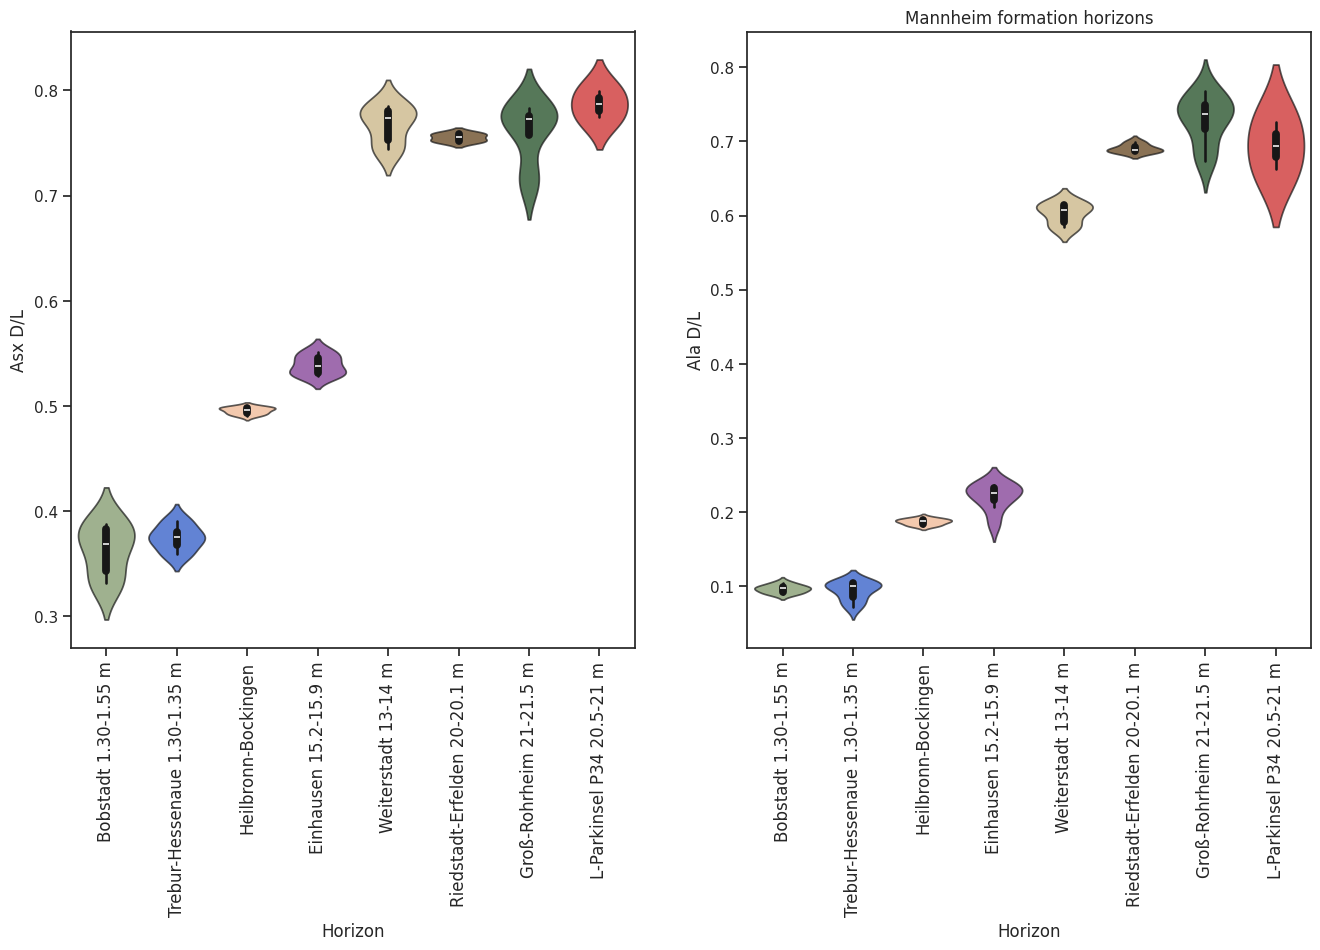

In [354]:
mannheim_palette = {'Bobstadt': '#769958',
                    'Trebur-Hessenaue': '#0343df', #dark yellow
                    'L-Parkinsel P34': '#e50000',
                    'Einhausen': '#7e1e9c',
                    "Heilbronn-Bockingen":"#ffb07c",
                    'Weiterstadt': '#d1b26f',
                    'Riedstadt-Erfelden' : '#653700', #navy
                    'Groß-Rohrheim': '#06470c', #leaf green
                    'L-Parkinsel P34': '#e50000'
                    }


MainCategory_ASX = MH_THAA_ASX["Quaternary sites"]
SubCategory_ASX = MH_THAA_ASX["Horizon"]

MainCategory_ALA = MH_THAA_ALA["Quaternary sites"]
SubCategory_ALA = MH_THAA_ALA["Horizon"]

fig, ax = plt.subplots(figsize=(16, 8), nrows=1, ncols=2)

sns.violinplot(ax=ax[0], x= SubCategory_ASX, y=MH_THAA_ASX["Asx D/L"], hue=MainCategory_ASX, palette=mannheim_palette, data=MH_THAA_ASX, split=False, dodge=False,legend=False, alpha = 0.7)
sns.violinplot(ax=ax[1], x= SubCategory_ALA, y=MH_THAA_ALA["Ala D/L"], hue=MainCategory_ALA, palette=mannheim_palette, data=MH_THAA_ALA, split=False, dodge=False,legend=False, alpha = 0.7)

plt.title("Mannheim formation horizons")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, fontsize=12)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, fontsize=12)
#plt.legend(loc="lower right")
plt.show()

/tmp/ipython-input-355-2158139344.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
/tmp/ipython-input-355-2158139344.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)


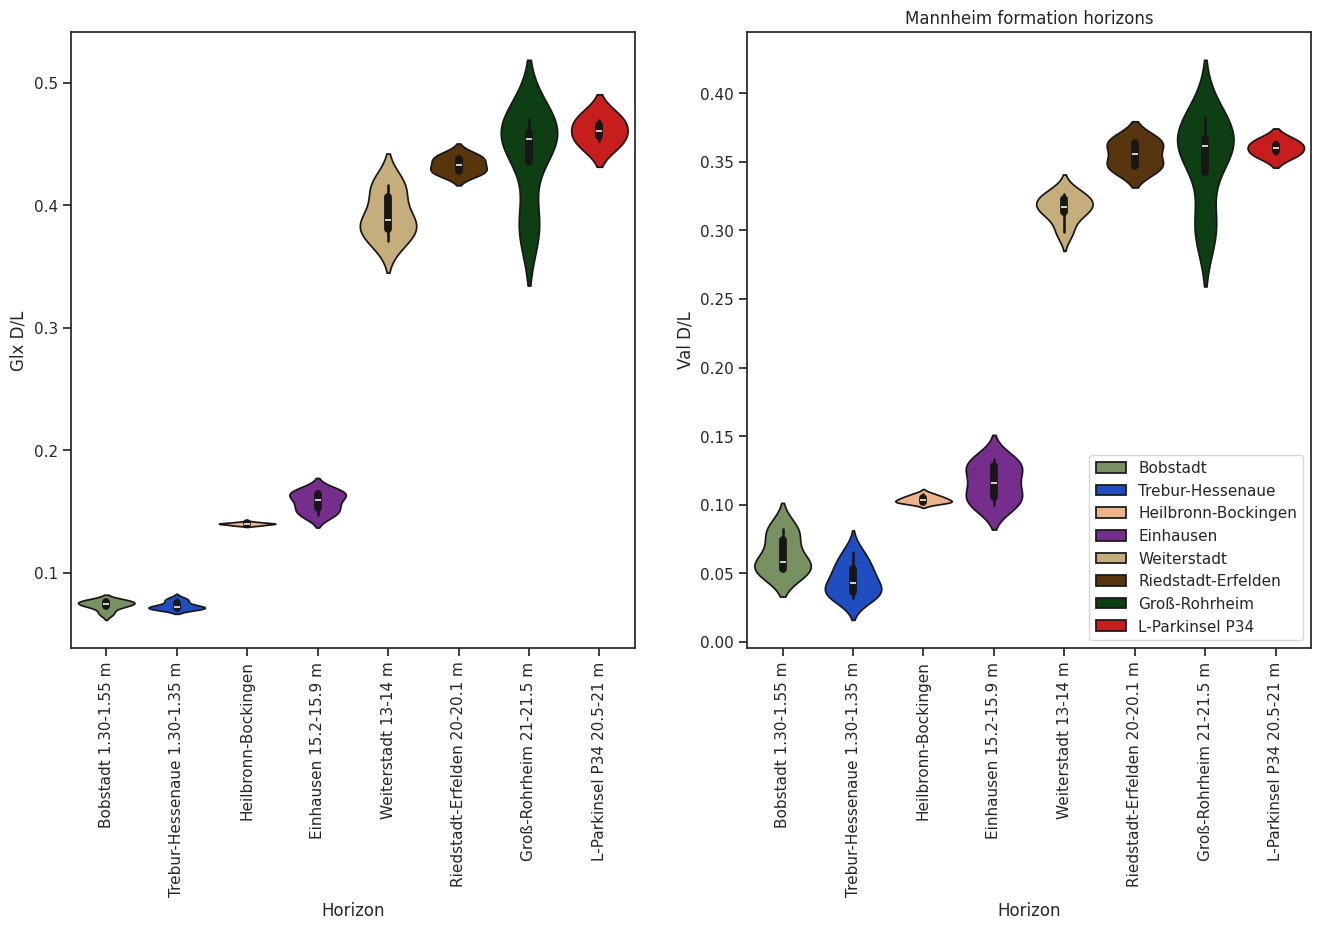

In [355]:
MainCategory_ASX = MH_THAA_ASX["Quaternary sites"]
SubCategory_ASX = MH_THAA_ASX["Horizon"]

MainCategory_ALA = MH_THAA_ALA["Quaternary sites"]
SubCategory_ALA = MH_THAA_ALA["Horizon"]

fig, ax = plt.subplots(figsize=(16, 8), nrows=1, ncols=2)

sns.violinplot(ax=ax[0], x= SubCategory_ASX, y=MH_THAA_ASX["Glx D/L"], hue=MainCategory_ASX, palette=mannheim_palette, data=MH_THAA_ASX, split=False, dodge=False,legend=False)
sns.violinplot(ax=ax[1], x= SubCategory_ALA, y=MH_THAA_ALA["Val D/L"], hue=MainCategory_ALA, palette=mannheim_palette, data=MH_THAA_ALA, split=False, dodge=False)

plt.title("Mannheim formation horizons")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
plt.legend(loc="lower right")
plt.show()

In [356]:
cross_plot_df = THAA_CSV.loc[THAA_CSV['Age rank_THAA'].isin([3])]

cross_df = pd.DataFrame(data={
    'Lithology' : cross_plot_df['Lithology_THAA'],
    'Quaternary sites' : cross_plot_df['Quaternary sites_THAA'],
    'Horizon' : cross_plot_df['Horizon_THAA'],
    'Asx D/L_THAA' : cross_plot_df['Asx D/L_THAA'],
    'Ala D/L_THAA' : cross_plot_df['Ala D/L_THAA'],
    'Glx D/L_THAA' : cross_plot_df['Glx D/L_THAA'],
    'Val D/L_THAA' : cross_plot_df['Val D/L_THAA']
})

cross_df

,Lithology,Quaternary sites,Horizon,Asx D/L_THAA,Ala D/L_THAA,Glx D/L_THAA,Val D/L_THAA
30,Mannheim,Weiterstadt,Weiterstadt 13-14 m,0.773054,0.586019,0.378487,0.315141
31,Mannheim,Weiterstadt,Weiterstadt 13-14 m,0.774495,0.584536,0.370876,0.299019
32,Mannheim,Weiterstadt,Weiterstadt 13-14 m,0.746622,0.615092,0.416320,0.319301
33,Mannheim,Weiterstadt,Weiterstadt 13-14 m,0.744369,0.609280,0.413474,0.312618
34,Mannheim,Weiterstadt,Weiterstadt 13-14 m,0.785115,0.616890,0.387996,0.326964
...,...,...,...,...,...,...,...
157,Viernheim,Griesheim,Griesheim 37-43 m,0.805542,0.742825,0.529765,0.390056
158,Viernheim,Griesheim,Griesheim 37-43 m,0.824972,0.711795,0.537550,0.391356
159,Viernheim,Griesheim,Griesheim 37-43 m,0.824887,0.753053,0.527927,0.381654
160,Viernheim,Griesheim,Griesheim 37-43 m,0.800233,0.708331,0.496265,0.382798


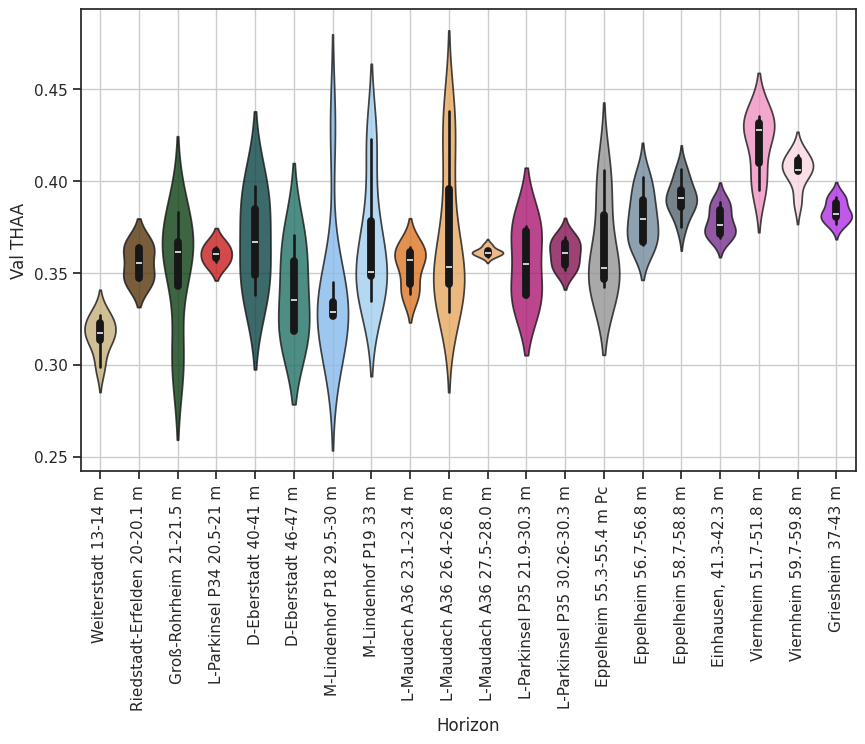

In [357]:

# Plot with scatter plot and density contours
plt.figure(figsize=(10, 6))


palette_group3 = {'Weiterstadt 13-14 m': '#d1b26f',
                    'Riedstadt-Erfelden 20-20.1 m' : '#653700',
                    'L-Parkinsel P34 20.5-21 m' : "#e50000",
                    'M-Lindenhof P18 29.5-30 m': '#75bbfd',
                    'M-Lindenhof P19 33 m': '#95d0fc',
                    'Einhausen, 41.3-42.3 m': '#7e1e9c',
                    'L-Maudach A36 23.1-23.4 m' : '#f97306',
                    'L-Maudach A36 26.4-26.8 m' : '#fdaa48',
                    'L-Maudach A36 27.5-28.0 m' : '#ffa756',
                    'Eppelheim 55.3-55.4 m Pc' : '#929591',
                    'Eppelheim 56.7-56.8 m' : '#6b8ba4',
                    'Eppelheim 58.7-58.8 m' : '#516572',
                    'L-Parkinsel P35 21.9-30.3 m': '#c20078',
                    'L-Parkinsel P35 30.26-30.3 m': '#960056',
                    'L-Parkinsel P35 50-50.3 m': '#cb0162',
                    'Viernheim 51.7-51.8 m' : '#ff81c0',
                    'Viernheim 59.7-59.8 m' : '#ffd1df',
                    'Groß-Rohrheim 21-21.5 m' : '#06470c',
                    'D-Eberstadt 40-41 m' : '#014d4e',
                    'D-Eberstadt 46-47 m' : '#137e6d',
                    'Griesheim 37-43 m' : '#bc13fe'}


# Scatter plot with color coding by category
sns.violinplot(x='Horizon', y='Val D/L_THAA', hue="Horizon", data=cross_df, palette=palette_group3, alpha=0.8)

plt.xticks(rotation=90)

# Add labels and title

plt.ylabel('Val THAA', fontsize=12)


# Show the plot
plt.grid(True)
plt.show()

In [358]:
nURG5_6_plot_df = THAA_CSV.loc[THAA_CSV['Age rank_THAA'].isin([5,6])]

nURG5_6_plot_df = pd.DataFrame(data={
    'Lithology' : nURG5_6_plot_df['Lithology_THAA'],
    'Quaternary sites' : nURG5_6_plot_df['Quaternary sites_THAA'],
    'Horizon' : nURG5_6_plot_df['Horizon_THAA'],
    'Asx D/L_THAA' : nURG5_6_plot_df['Asx D/L_THAA'],
    'Ala D/L_THAA' : nURG5_6_plot_df['Ala D/L_THAA'],
    'Glx D/L_THAA' : nURG5_6_plot_df['Glx D/L_THAA'],
    'Val D/L_THAA' : nURG5_6_plot_df['Val D/L_THAA']
})


In [359]:
nURG5_FAA_plot_df = FAA_CSV.loc[FAA_CSV['Age rank_FAA'].isin([5,6.1,6.2])]

nURG5_FAA_plot_df = pd.DataFrame(data={
    'Lithology' : nURG5_FAA_plot_df['Lithology_FAA'],
    'Quaternary sites' : nURG5_FAA_plot_df['Quaternary sites_FAA'],
    'Horizon' : nURG5_FAA_plot_df['Horizon_FAA'],
    'Asx D/L_FAA' : nURG5_FAA_plot_df['Asx D/L_FAA'],
    'Ala D/L_FAA' : nURG5_FAA_plot_df['Ala D/L_FAA'],
    'Glx D/L_FAA' : nURG5_FAA_plot_df['Glx D/L_FAA'],
    'Val D/L_FAA' : nURG5_FAA_plot_df['Val D/L_FAA']
})


In [360]:
EPD_df = EPD_df.sort_values(by=['Val D/L_FAA'], ascending=True)
EPD_df.head()


,Quaternary_sites,Stratigraphy,SuspectedAge,Asx D/L_FAA,Ala D/L_FAA,Glx D/L_FAA,Val D/L_FAA,[Ser]/[Ala]_FAA,Asx D/L_THAA,Ala D/L_THAA,Glx D/L_THAA,Val D/L_THAA,[Ser]/[Ala]_THAA
10,Bavel,clay pit I,Bavelian,0.910172,0.823181,0.596756,0.608564,0.051879,0.865794,0.823076,0.636792,0.556842,0.068692
13,Bavel,clay pit I,Bavelian,0.906437,0.864042,0.663210,0.622165,0.050752,0.866934,0.813027,0.644434,0.534545,0.089783
8,Bavel,clay pit I,Bavelian,0.910044,0.877361,0.845860,0.624853,0.061285,0.846465,0.793546,0.635601,0.483076,0.081401
12,Bavel,clay pit I,Bavelian,0.911430,0.876218,0.709503,0.631466,0.056017,0.868383,0.807013,0.644796,0.525382,0.085489
11,Bavel,clay pit I,Bavelian,0.904842,0.816670,0.603541,0.632771,0.049733,0.866447,0.810918,0.628615,0.557910,0.069883


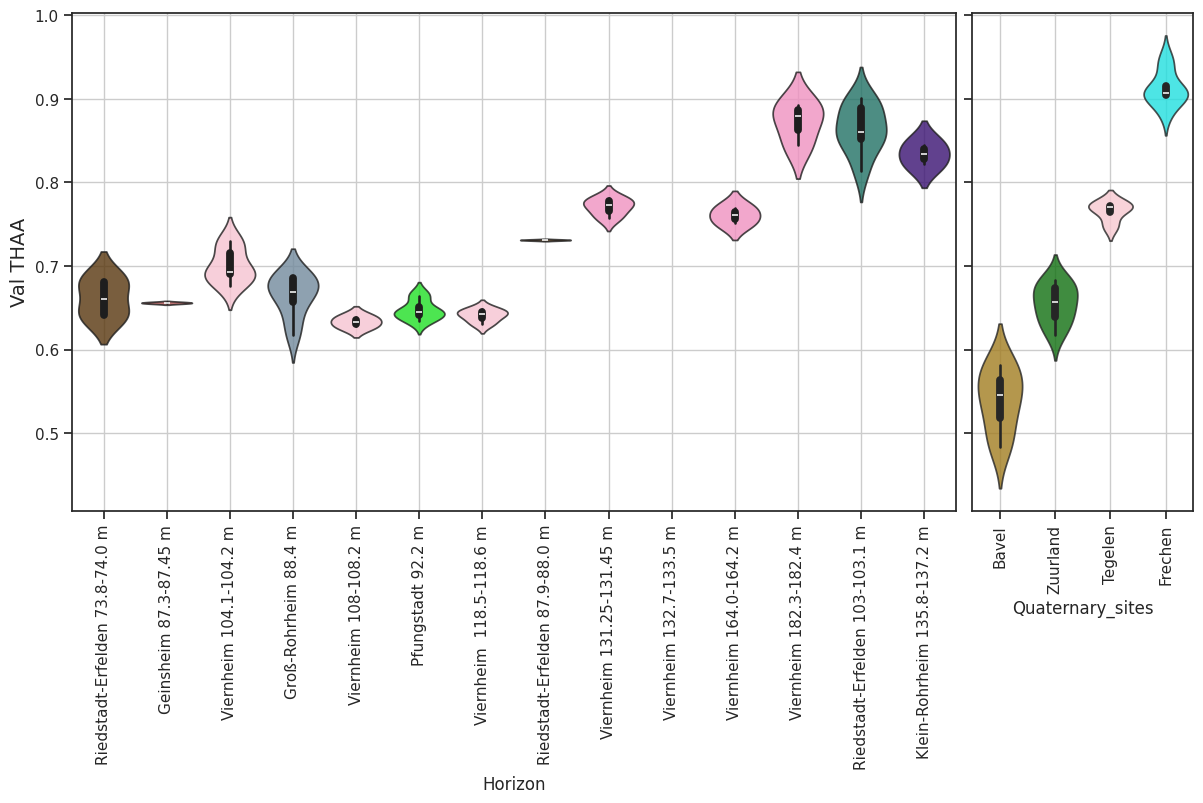

In [361]:

# Plot with scatter plot and density contours
fig, ax = plt.subplots(ncols= 2, figsize = (12,8), sharey=True, gridspec_kw={'width_ratios': [4, 1]})

palette_EP = {'Bavel': 'darkgoldenrod', 'Tegelen' : 'pink', 'Zuurland' : 'green', 'Frechen' : 'cyan'}

palette_crossplot = {'L-Parkinsel P35 50-50.3 m': '#c20078',
                    'Viernheim 70.0-70.3 m' : '#ffd1df',
                    'Viernheim 74.6-74.7 m' : '#ffd1df',
                    'Griesheim 65-66 m' : '#bc13fe',
                    'Klein-Rohrheim 59.2-59.7 m' : '#380282',
                    'Riedstadt-Erfelden 73.8-74.0 m' : '#653700',
                    'Geinsheim 87.3-87.45 m' : '#bb3f3f',
                    'Viernheim 104.1-104.2 m' : '#ffbacd',
                    'Groß-Rohrheim 88.4 m': '#6b8ba4',
                    'Viernheim 108-108.2 m': '#ffbacd',
                    'Pfungstadt 92.2 m': '#01ff07',
                    'Viernheim  118.5-118.6 m' : '#ffbacd',
                    'Riedstadt-Erfelden 87.9-88.0 m' : '#653700',
                    'Viernheim 131.25-131.45 m' : '#ff81c0',
                    'Viernheim 132.7-133.5 m' : '#ff81c0',
                    'Viernheim 164.0-164.2 m' : '#ff81c0',
                    'Viernheim 182.3-182.4 m' : '#ff81c0',
                    'Riedstadt-Erfelden 103-103.1 m' : '#137e6d',
                    'Klein-Rohrheim 135.8-137.2 m' : '#380282'}

#set style

# Scatter plot with color coding by category
sns.violinplot(ax=ax[0], x='Horizon', y='Val D/L_THAA', hue="Horizon", data=nURG5_6_plot_df, palette=palette_crossplot, alpha=0.8)
ax[0].grid(True)
# Scatter plot with color coding by category
sns.violinplot(ax=ax[1], x='Quaternary_sites', y='Val D/L_THAA', hue="Quaternary_sites", data=EPD_df, palette=palette_EP, alpha=0.8)
ax[1].grid(True)

ax[0].tick_params(axis='x', labelrotation=90)
ax[1].tick_params(axis='x', labelrotation=90)
# Add labels and title

ax[0].set_ylabel('Val THAA', fontsize=14)

fig.tight_layout(pad=0.5)

# Show the plot

plt.show()

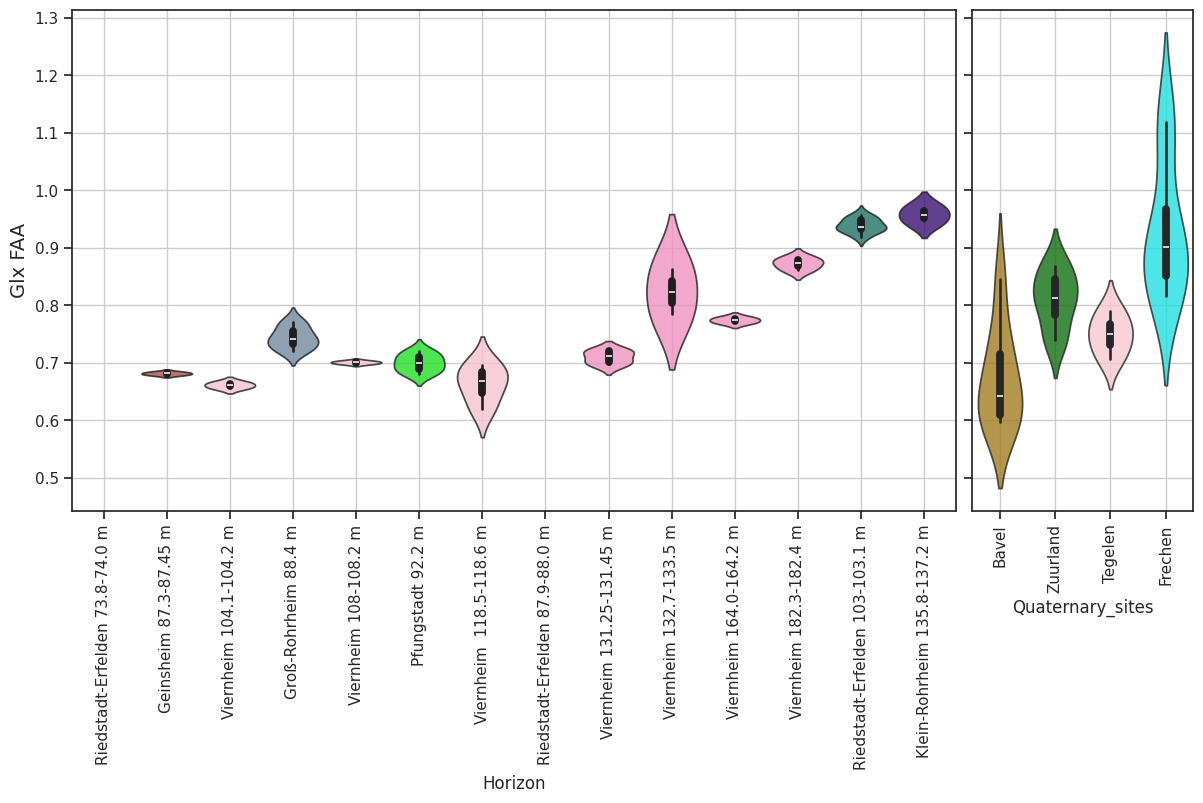

In [362]:
sns.set_style("ticks")
# Plot with scatter plot and density contours
fig, ax = plt.subplots(ncols= 2, figsize = (12,8), sharey=True, gridspec_kw={'width_ratios': [4, 1]})


# Scatter plot with color coding by category
sns.violinplot(ax=ax[0],x='Horizon', y='Glx D/L_FAA', hue="Horizon", data=nURG5_FAA_plot_df, palette=palette_crossplot, alpha=0.8)
ax[0].grid(True)
# Scatter plot with color coding by category

sns.violinplot(ax=ax[1], x='Quaternary_sites', y='Glx D/L_FAA', hue="Quaternary_sites", data=EPD_df, palette=palette_EP, alpha=0.8)
ax[1].grid(True)

ax[0].tick_params(axis='x', labelrotation=90)
ax[1].tick_params(axis='x', labelrotation=90)
# Add labels and title
ax[0].set_ylabel('Glx FAA', fontsize=14)

fig.tight_layout(pad=0.5)

# Show the plot

plt.show()

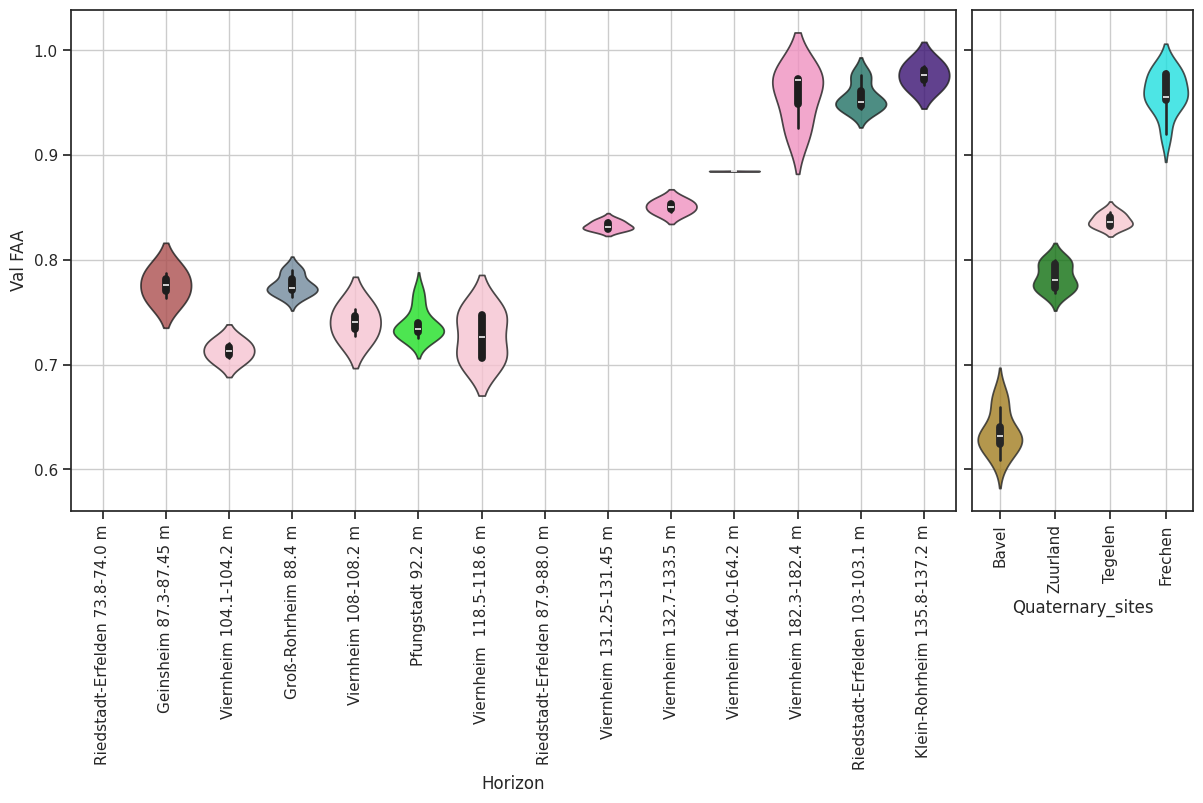

In [363]:
sns.set_style("ticks")
# Plot with scatter plot and density contours
fig, ax = plt.subplots(ncols= 2, figsize = (12,8), sharey=True, gridspec_kw={'width_ratios': [4, 1]})


# Scatter plot with color coding by category
sns.violinplot(ax=ax[0],x='Horizon', y='Val D/L_FAA', hue="Horizon", data=nURG5_FAA_plot_df, palette=palette_crossplot, alpha=0.8)
ax[0].grid(True)
# Scatter plot with color coding by category

sns.violinplot(ax=ax[1], x='Quaternary_sites', y='Val D/L_FAA', hue="Quaternary_sites", data=EPD_df, palette=palette_EP, alpha=0.8)
ax[1].grid(True)
ax[0].tick_params(axis='x', labelrotation=90)
ax[1].tick_params(axis='x', labelrotation=90)
# Add labels and title
ax[0].set_ylabel('Val FAA', fontsize=12)

fig.tight_layout(pad=0.5)

# Show the plot

plt.show()

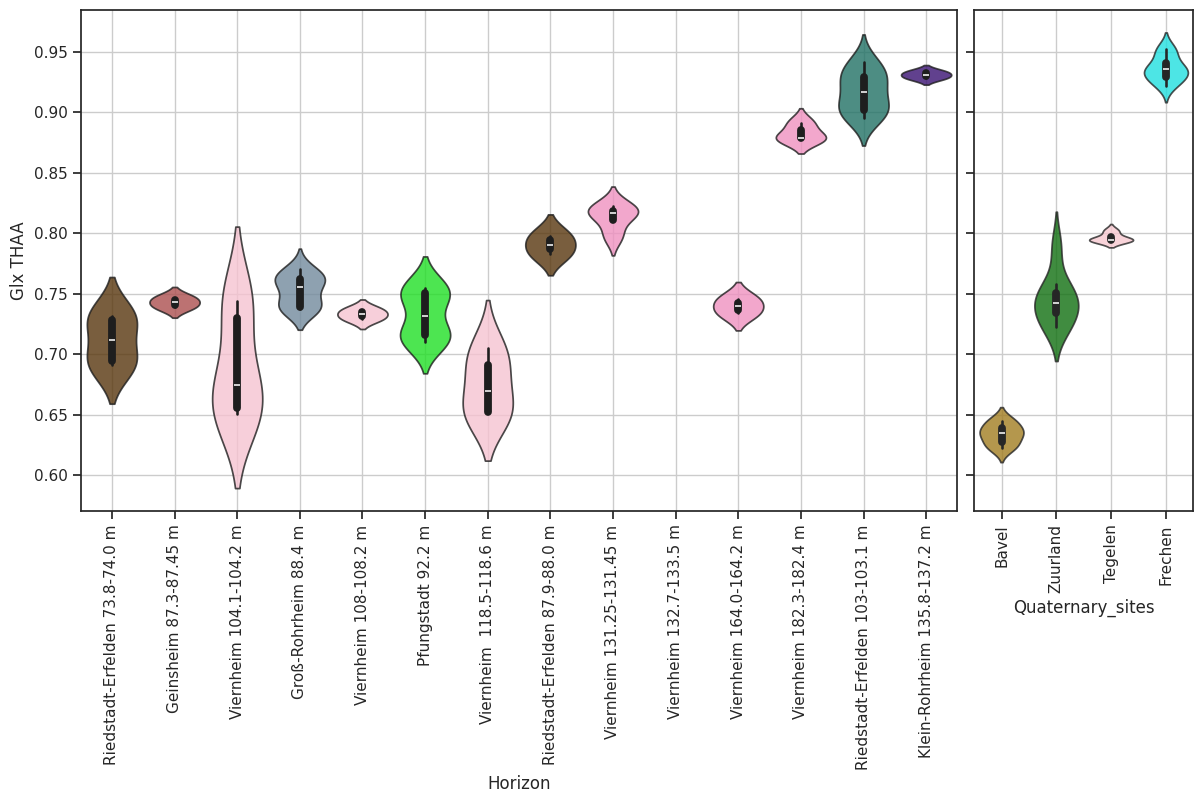

In [364]:
sns.set_style("ticks")
# Plot with scatter plot and density contours
fig, ax = plt.subplots(ncols= 2, figsize = (12,8), sharey=True, gridspec_kw={'width_ratios': [4, 1]})

palette_EP = {'Bavel': 'darkgoldenrod', 'Tegelen' : 'pink', 'Zuurland' : 'green', 'Frechen' : 'cyan'}

palette_group56 = {'L-Parkinsel P35 50-50.3 m': '#c20078',
                    'Viernheim 70.0-70.3 m' : '#ffd1df',
                    'Viernheim 74.6-74.7 m' : '#ffd1df',
                    'Griesheim 65-66 m' : '#bc13fe',
                    'Klein-Rohrheim 59.2-59.7 m' : '#380282',
                    'Riedstadt-Erfelden 73.8-74.0 m' : '#653700',
                    'Geinsheim 87.3-87.45 m' : '#bb3f3f',
                    'Viernheim 104.1-104.2 m' : '#ffbacd',
                    'Groß-Rohrheim 88.4 m': '#6b8ba4',
                    'Viernheim 108-108.2 m': '#ffbacd',
                    'Pfungstadt 92.2 m': '#01ff07',
                    'Viernheim  118.5-118.6 m' : '#ffbacd',
                    'Riedstadt-Erfelden 87.9-88.0 m' : '#653700',
                    'Viernheim 131.25-131.45 m' : '#ff81c0',
                    'Viernheim 132.7-133.5 m' : '#ff81c0',
                    'Viernheim 164.0-164.2 m' : '#ff81c0',
                    'Viernheim 182.3-182.4 m' : '#ff81c0',
                    'Riedstadt-Erfelden 103-103.1 m' : '#137e6d',
                    'Klein-Rohrheim 135.8-137.2 m' : '#380282'}

#set style

# Scatter plot with color coding by category
sns.violinplot(ax=ax[0], x='Horizon', y='Glx D/L_THAA', hue="Horizon", data=nURG5_6_plot_df, palette=palette_group56, alpha=0.8)
# Scatter plot with color coding by category
ax[0].grid(True)
sns.violinplot(ax=ax[1], x='Quaternary_sites', y='Glx D/L_THAA', hue="Quaternary_sites", data=EPD_df, palette=palette_EP, alpha=0.8)

ax[0].tick_params(axis='x', labelrotation=90)
ax[1].tick_params(axis='x', labelrotation=90)
# Add labels and title

ax[0].set_ylabel('Glx THAA', fontsize=12)

fig.tight_layout(pad=0.5)

# Show the plot
plt.grid(True)
plt.show()

Plots for comparisons between new nURG aminostratigraphy with early Middle Pleistocene sites in the surrounding area.

In [365]:
#transforming csv into pandas dataframe

EMP_FAA = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EQuaTe data/Germany/HeidelbergBasin/EarlyMiddlePleistoceneSites.xlsx", sheet_name='FAA')
EMP_THAA = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EQuaTe data/Germany/HeidelbergBasin/EarlyMiddlePleistoceneSites.xlsx", sheet_name='THAA')


FAA_EMP = EMP_FAA.add_suffix("_FAA")
#replacing NaN values with 0s to prevent code failure
#column numbers should match index for Asx D/L to Total column labels
for col in FAA_EMP.columns[9:]:
    FAA_EMP[col] = pd.to_numeric(FAA_EMP[col], errors="coerce")

FAA_EMP = FAA_EMP.replace(np.nan, 0.0, regex=True)

FAA_EMP.sort_values(by=['NEaarNo_FAA'], ascending=True)


THAA_EMP = EMP_THAA.add_suffix("_THAA")

for col in THAA_EMP.columns[14:25]:
    THAA_EMP[col] = pd.to_numeric(THAA_EMP[col], errors="coerce")

THAA_EMP = THAA_EMP.replace(np.nan, 0.0, regex=True)
FAA_EMP.columns

Index(['Sample name_FAA', 'NEaarNo_FAA', 'Genus_FAA', 'Species_FAA',
       'material_FAA', 'location_FAA', 'Quaternary sites_FAA',
       'Stratigraphy_FAA', 'SuspectedAge_FAA', 'Asx D/L_FAA', 'Glx D/L_FAA',
       'Ser D/L_FAA', 'Arg D/L_FAA', 'Ala D/L_FAA', 'Tyr D/L_FAA',
       'Val D/L_FAA', 'Phe D/L_FAA', 'Leu D/L_FAA', 'Ile D/L_FAA',
       '[Ser]/[Ala]_FAA', '[Asx]_FAA', '[Glx]_FAA', '[Ser]_FAA', '[L-Thr]_FAA',
       '[L-His]_FAA', '[Gly]_FAA', '[Arg]_FAA', '[Ala]_FAA', '[Tyr]_FAA',
       '[Val]_FAA', '[Phe]_FAA', '[Leu]_FAA', '[Ile]_FAA', 'Total_FAA',
       '[Asx].1_FAA', '[Glx].1_FAA', '[Ser].1_FAA', '[L-Thr].1_FAA',
       '[L-His].1_FAA', '[Gly].1_FAA', '[Arg].1_FAA', '[Ala].1_FAA',
       '[Tyr].1_FAA', '[Val].1_FAA', '[Phe].1_FAA', '[Leu].1_FAA',
       '[Ile].1_FAA'],
      dtype='object')

In [366]:
EMP_df = pd.DataFrame(data={
    'Sample name' : FAA_EMP['Sample name_FAA'],
    'Quaternary_sites' : FAA_EMP['Quaternary sites_FAA'],
    'Stratigraphy' : FAA_EMP['Stratigraphy_FAA'],
    'SuspectedAge': FAA_EMP['SuspectedAge_FAA'],
    'Asx D/L_FAA' : FAA_EMP['Asx D/L_FAA'],
    'Ala D/L_FAA' : FAA_EMP['Ala D/L_FAA'],
    'Glx D/L_FAA' : FAA_EMP['Glx D/L_FAA'],
    'Val D/L_FAA' : FAA_EMP['Val D/L_FAA'],
    'Asx D/L_THAA' : THAA_EMP['Asx D/L_THAA'],
    'Ala D/L_THAA' : THAA_EMP['Ala D/L_THAA'],
    'Glx D/L_THAA' : THAA_EMP['Glx D/L_THAA'],
    'Val D/L_THAA' : THAA_EMP['Val D/L_THAA']
    })

EMP_df.columns


Index(['Sample name', 'Quaternary_sites', 'Stratigraphy', 'SuspectedAge',
       'Asx D/L_FAA', 'Ala D/L_FAA', 'Glx D/L_FAA', 'Val D/L_FAA',
       'Asx D/L_THAA', 'Ala D/L_THAA', 'Glx D/L_THAA', 'Val D/L_THAA'],
      dtype='object')

In [367]:
EMP_df = EMP_df.groupby(['Sample name'], as_index=False).agg(
                      {'Asx D/L_FAA':['mean', 'std'],'Glx D/L_FAA':['mean', 'std'], 'Ala D/L_FAA':['mean', 'std'], 'Val D/L_FAA':['mean', 'std'],
                       'Asx D/L_THAA':['mean', 'std'],'Glx D/L_THAA':['mean', 'std'], 'Ala D/L_THAA':['mean', 'std'], 'Val D/L_THAA':['mean', 'std'],
                       "Quaternary_sites": 'first', 'Stratigraphy': 'first', "SuspectedAge" : "first"})

EMP_df.columns = ["Sample name", "Asx D/L mean_FAA", "Asx D/L std_FAA", "Glx D/L mean_FAA", "Glx D/L std_FAA",
                          "Ala D/L mean_FAA", "Ala D/L std_FAA", "Val D/L mean_FAA", "Val D/L std_FAA",
                          "Asx D/L mean_THAA", "Asx D/L std_THAA", "Glx D/L mean_THAA", "Glx D/L std_THAA",
                          "Ala D/L mean_THAA", "Ala D/L std_THAA", "Val D/L mean_THAA", "Val D/L std_THAA",
                          "Quaternary sites", 'Stratigraphy', 'SuspectedAge']

In [368]:
EMP_df["Horizon"] = EMP_df["Quaternary sites"] + " " + EMP_df["Stratigraphy"]

In [369]:
no_mauer = EMP_df.loc[EMP_df['Quaternary sites'].isin(["Miesenheim", "Wiesbaden (Mosbach Sands)", "Hemsbach", "Wiesbaden Dyckerhof Pit"])]

/tmp/ipython-input-370-796327179.py:30: UserWarning: The markers list has more values (13) than needed (10), which may not be intended.
  sns.scatterplot(ax=ax[0], x="Ala D/L mean_FAA", y="Ala D/L mean_THAA",
/tmp/ipython-input-370-796327179.py:45: UserWarning: The markers list has more values (13) than needed (10), which may not be intended.
  sns.scatterplot(ax=ax[1], x="Val D/L mean_FAA", y="Val D/L mean_THAA",


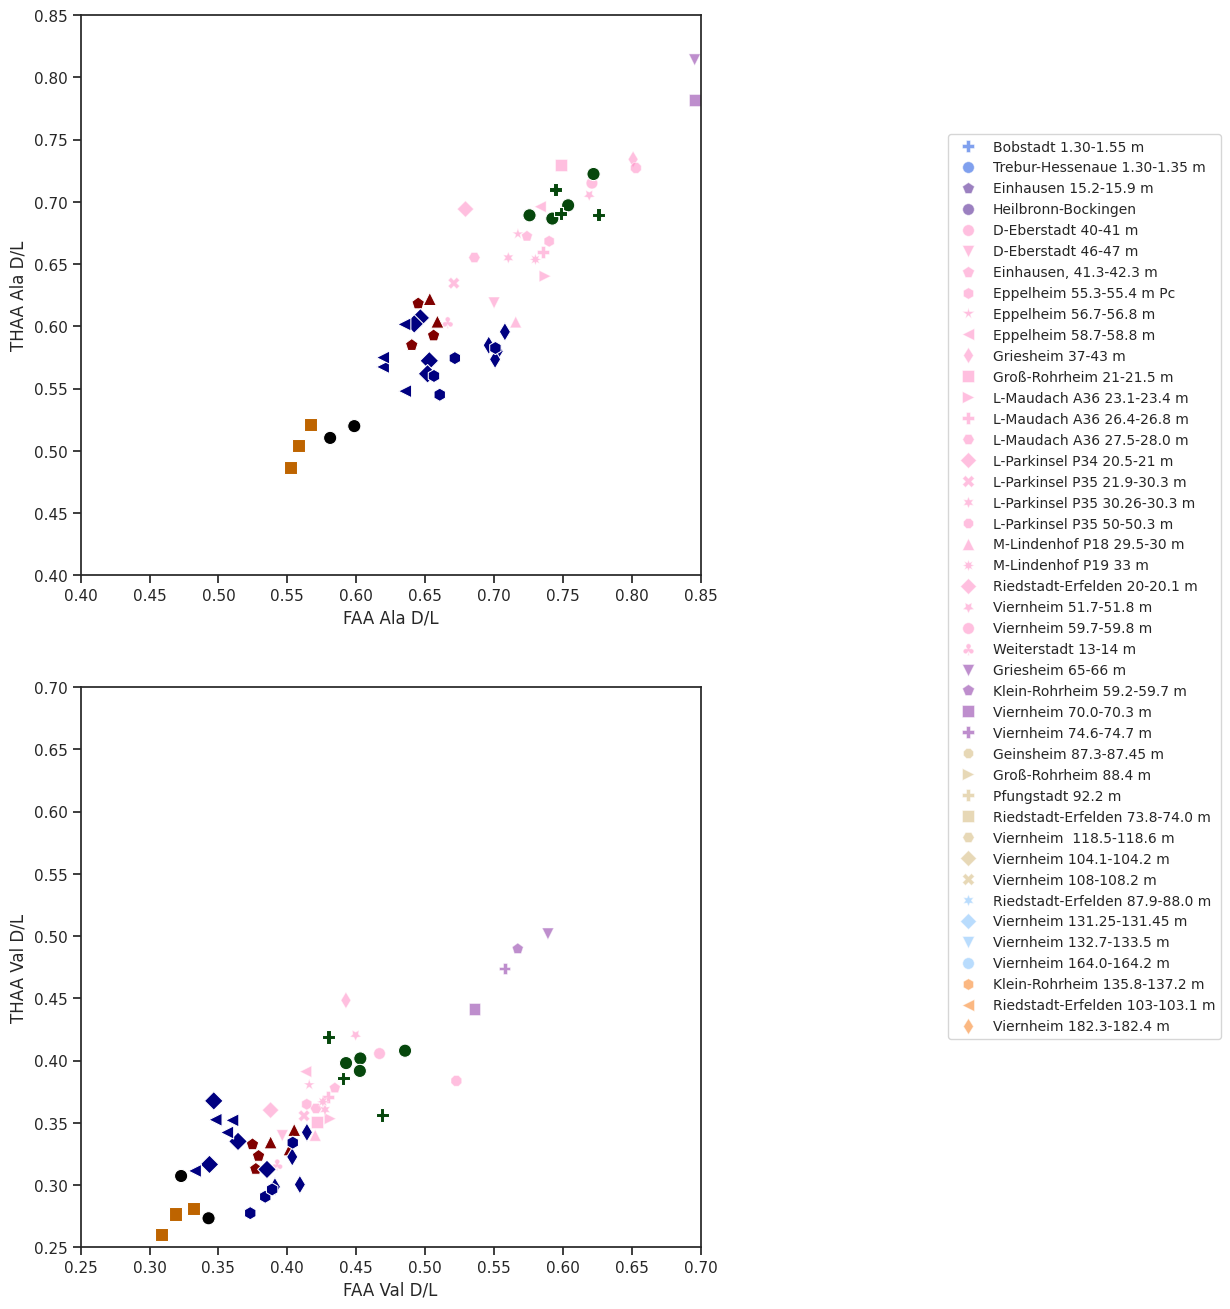

In [370]:
markers_age = ['P', 'o', 'p', 'o',
               'o','v', 'p', 'h', '*', '<',  'd', 's', '>', 'P', 'H', 'D', 'X', (6,1,0), '8', '^', (8,1,0), "D", (5,1,180), 'o',
               '$\clubsuit$', 'v', 'p', 's', 'P',
               '8', '>', 'P', 's', 'H', 'D', 'X', (6,1,0),
               'D', 'v', 'o',
               'h', '<',  'd']


palette_ageclassification = {
    1.0: '#0343df', 2.0: '#380282', 3.0: '#ff81c0',
    4.0: '#7e1e9c', 5.0: '#d1b26f', 6.1: '#75bbfd', 6.2: '#f97306'
}

palette_EMP = {"Miesenheim" : "black", "Mosbach Sands (Quarry east of Wiesbaden)" : "navy", "Hemsbach" : "#06470c", "Mosbach Sands (Dyckerhoff Pit)" : "maroon",
                "Mauer" : "#be6400"
               }
markers_EM = ["o", "P", "s", "o", "p", "^", "d", "D", "<", "h", ">", "*", "v"]

#FAA_THAA = FAA_THAA.sort_values(by=['Depth_FAA'], ascending=True)
EMP_df = EMP_df.sort_values(by=['Quaternary sites', 'Horizon'], ascending=True)

sns.set(style="ticks")
fig, ax = plt.subplots(2, 1, figsize=(8, 16))

# First scatter plot
sns.scatterplot(ax=ax[0], x="AlaFAAmean", y="AlaTHAAmean",
                data=FAA_THAA_mean, hue="Age rank_FAA",
                style="Horizon_FAA", markers=markers_age, s=70,
                palette=palette_ageclassification, legend=False, alpha=0.5, zorder=1)
sns.scatterplot(ax=ax[0], x="Ala D/L mean_FAA", y="Ala D/L mean_THAA",
                data=EMP_df, hue="Quaternary sites",
                style="Horizon", markers=markers_EM, s=90,
                palette=palette_EMP, legend=False, zorder=2)

ax[0].set_xlabel("FAA Ala D/L")
ax[0].set_ylabel("THAA Ala D/L")
ax[0].set_ylim(0.4, 0.85)
ax[0].set_xlim(0.4, 0.85)

# Second scatter plot
sns.scatterplot(ax=ax[1], x="ValFAAmean", y="ValTHAAmean",
                data=FAA_THAA_mean, hue="Age rank_FAA",
                style="Horizon_FAA", markers=markers_age, s=70,
                palette=palette_ageclassification, legend=True, alpha=0.5)
sns.scatterplot(ax=ax[1], x="Val D/L mean_FAA", y="Val D/L mean_THAA",
                data=EMP_df, hue="Quaternary sites",
                style="Horizon", markers=markers_EM, s=90,
                palette=palette_EMP, legend=False, zorder=2)
ax[1].set_xlabel("FAA Val D/L")
ax[1].set_ylabel("THAA Val D/L")
ax[1].set_ylim(0.25, 0.7)
ax[1].set_xlim(0.25, 0.7)

# Adjust legend to ensure colors are consistent
depth_to_site_dict = FAA_THAA_mean.set_index("Horizon_FAA")["Age rank_FAA"].to_dict()
depth_to_site_dict = {key: str(value) for key, value in depth_to_site_dict.items()}

# create a dictionary mapping the subscales to their color
handles, labels = ax[1].get_legend_handles_labels()
index_depth_title = labels.index("Horizon_FAA")
color_dict = {label: handle.get_markerfacecolor()
for handle, label in zip(handles[1:index_depth_title], labels[1:index_depth_title])}
# loop through the items, assign color via the subscale of the item idem
for handle, label in zip(handles[index_depth_title + 1:], labels[index_depth_title + 1:]):
  handle.set_markerfacecolor(color_dict[depth_to_site_dict[label]])
#create a legend only using the items
#legend1 = plt.legend(handles[index_depth_title + 1:], labels[index_depth_title + 1:], title='Site & Horizon',
 #                   loc="upper center", bbox_to_anchor=(0.5, -0.05), fontsize=10, ncol=5)

legend = ax[1].legend(handles[index_depth_title + 1:], labels[index_depth_title + 1:], loc='upper right', ncol=1,
                         fontsize=10, ncols=1)
legend.set_bbox_to_anchor((1.85, 2))  # Adjust the anchor point for the legend

#handles, labels = ax[1].get_legend_handles_labels()
#color_dict = {str(label): palette_EMP[depth_to_site_dict[label]] for label in depth_to_site_dict}

# Update legend handles with correct colors
#for handle, label in zip(handles, labels):
 #   if label in color_dict:
  #      handle.set_color(color_dict[label])
   #     handle.set_markerfacecolor(color_dict[label])

# Create the legend with the updated handles
#legend = ax[1].legend(handles, labels, loc='upper right', ncol=1, fontsize=10)
#legend.set_bbox_to_anchor((1.5, 1))

plt.show()

# Statistics

In [371]:
from scipy import linalg

In [372]:
FAA_THAA_mean = FAA_THAA.groupby(['Horizon_FAA'], as_index=False).agg(
                      {'Asx D/L mean_THAA':['mean', 'std'],'Glx D/L mean_THAA':['mean', 'std'], 'Ala D/L mean_THAA':['mean', 'std'],
                       'Val D/L mean_THAA':['mean', 'std']})
FAA_THAA_mean.columns = ["AgeRank", "Asxmean", "Asxstd", "Glxmean", "Glxstd",
                         "Alamean", "Alastd", "Valmean", "Valstd"]

FAA_THAA_mean

,AgeRank,Asxmean,Asxstd,Glxmean,Glxstd,Alamean,Alastd,Valmean,Valstd
0,Bobstadt 1.30-1.55 m,0.363250,0.027505,0.073699,0.003541,0.096303,0.005261,0.063445,0.014635
1,D-Eberstadt 40-41 m,0.770234,0.065175,0.390002,0.066747,0.613136,0.057654,0.367317,0.030948
2,D-Eberstadt 46-47 m,0.760952,0.050784,0.411378,0.036566,0.618911,0.006895,0.339733,0.030420
3,Einhausen 15.2-15.9 m,0.538987,0.010056,0.157938,0.008458,0.220825,0.018389,0.115922,0.014162
4,"Einhausen, 41.3-42.3 m",0.769651,0.011743,0.474858,0.012384,0.672399,0.012994,0.377975,0.008334
5,Eppelheim 55.3-55.4 m Pc,0.789416,0.023053,0.439568,0.005131,0.668375,0.024716,0.364890,0.028433
6,Eppelheim 56.7-56.8 m,0.756452,0.018990,0.451842,0.021183,0.674244,0.025055,0.380542,0.014756
7,Eppelheim 58.7-58.8 m,0.780441,0.016126,0.484352,0.019075,0.696141,0.012544,0.391128,0.008232
8,Geinsheim 87.3-87.45 m,0.877061,NaN,0.742746,NaN,0.896423,NaN,0.655942,NaN
9,Griesheim 37-43 m,0.832711,0.008751,0.519513,0.029572,0.734263,0.007350,0.448437,0.008635


In [373]:
from numpy.linalg import slogdet
from scipy.stats import chi2

def box_m_test(data, groups):
    """
    Perform Box's M test for equality of covariance matrices.
    :param data: DataFrame of the dependent variables (only the DVs, no categorical data).
    :param groups: Grouping variable (the categorical independent variable).
    :return: Box's M statistic and p-value.
    """
    # Ensure data and groups are aligned
    data = data.loc[groups.index]
    groups = groups.loc[data.index]

    # Filter groups with fewer than 2 observations
    valid_groups = groups[groups.map(groups.value_counts()) > 1]
    data = data.loc[valid_groups.index]
    groups = valid_groups

    # Unique groups
    unique_groups = groups.unique()
    k = len(unique_groups)  # Number of groups
    n = data.shape[0]  # Total number of observations
    p = data.shape[1]  # Number of variables

    if k >= n:
        raise ValueError("Number of groups cannot exceed the number of observations.")

    # Calculate pooled covariance matrix
    pooled_cov = np.zeros((p, p))
    group_covs = []
    group_sizes = []

    for group in unique_groups:
        group_data = data[groups == group]
        if len(group_data) <= 1:  # Skip groups with insufficient data
            continue
        group_cov = np.cov(group_data, rowvar=False)
        group_covs.append(group_cov)
        group_sizes.append(len(group_data))
        pooled_cov += (len(group_data) - 1) * group_cov

    pooled_cov /= (n - k)

    # Log-determinant of pooled covariance
    _, log_det_pooled = slogdet(pooled_cov)
    m = 0

    for i, group_cov in enumerate(group_covs):
        ni = group_sizes[i]
        _, log_det_group = slogdet(group_cov)
        m += (ni - 1) * log_det_group

    m -= (n - k) * log_det_pooled

    # Correction factor
    c = ((2 * p**2 + 3 * p - 1) / (6 * (k - 1))) * \
        (sum([1 / (ni - 1) for ni in group_sizes]) - 1 / (n - k))

    m_statistic = (1 - c) * m
    df = ((k - 1) * p * (p + 1)) / 2
    p_value = 1 - chi2.cdf(m_statistic, df)

    return m_statistic, p_value

from statsmodels.multivariate.manova import MANOVA

# Load your dataset
data = FAA_THAA_mean
# Perform MANOV


maov = MANOVA.from_formula('Asxmean + Alamean + Glxmean + Valmean ~ AgeRank', data=FAA_THAA_mean)
print(maov.mv_test())

                               Multivariate linear model
                                                                                        
-----------------------------------------------------------------------------------------
         Intercept               Value         Num DF   Den DF       F Value       Pr > F
-----------------------------------------------------------------------------------------
            Wilks' lambda             -0.0000  4.0000  -3.0000  495381665718.2902     nan
           Pillai's trace              1.0002  4.0000  -3.0000          3155.2281     nan
   Hotelling-Lawley trace  -660351851521.6003  4.0000  -1.5000  247631944320.6001     nan
      Roy's greatest root              0.0002  4.0000  -3.0000            -0.0002     nan
----------------------------------------------------------------------------------------
                                                                                        
----------------------------------------------

#Temperature plot

In [374]:
RE_CSV = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EQuaTe data/Germany/HeidelbergBasin/Temperature_URG/Temperature_raw_data (1)/Temperature_raw_data/6116_0638 FB 1_20-21 Riedstadt-Erfe_Temperatur - 2_ Messung (LIAG).xlsx")
Vi_CSV = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EQuaTe data/Germany/HeidelbergBasin/Temperature_URG/Temperature_raw_data (1)/Temperature_raw_data/6417_0226 B1_06 Forschungsbohrung V_Temperatur - Messung.xlsx")
We_CSV = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EQuaTe data/Germany/HeidelbergBasin/Temperature_URG/Temperature_raw_data (1)/Temperature_raw_data/6117_2243 EWS Weiterstadt 2010_0085_Temperatur - Messung GWM.xlsx")
DaG_CSV = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EQuaTe data/Germany/HeidelbergBasin/Temperature_URG/Temperature_raw_data (1)/Temperature_raw_data/6117_1932 B IX Grundwassererschließ_Temperatur - Messung.xlsx")
DaP_CSV = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EQuaTe data/Germany/HeidelbergBasin/Temperature_URG/Temperature_raw_data (1)/Temperature_raw_data/6117_1821 GWM 135_4 Pfungstadt_Temperatur - Messung.xlsx")
GKR_CSV = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EQuaTe data/Germany/HeidelbergBasin/Temperature_URG/Temperature_raw_data (1)/Temperature_raw_data/6217_0072 Ruhrgas HB 1 Grundwasserk_Temperatur - Messung 2009.xlsx")
No_CSV = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EQuaTe data/Germany/HeidelbergBasin/Temperature_URG/Temperature_raw_data (1)/Temperature_raw_data/6316_1092 Nordheim III (1989)_Temperatur - Messung.xlsx")
Ge_CSV = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EQuaTe data/Germany/HeidelbergBasin/Temperature_URG/Temperature_raw_data (1)/Temperature_raw_data/6116_0575 GWM B 1_06 Kiesgrube Gein_Temperatur - Messung.xlsx")


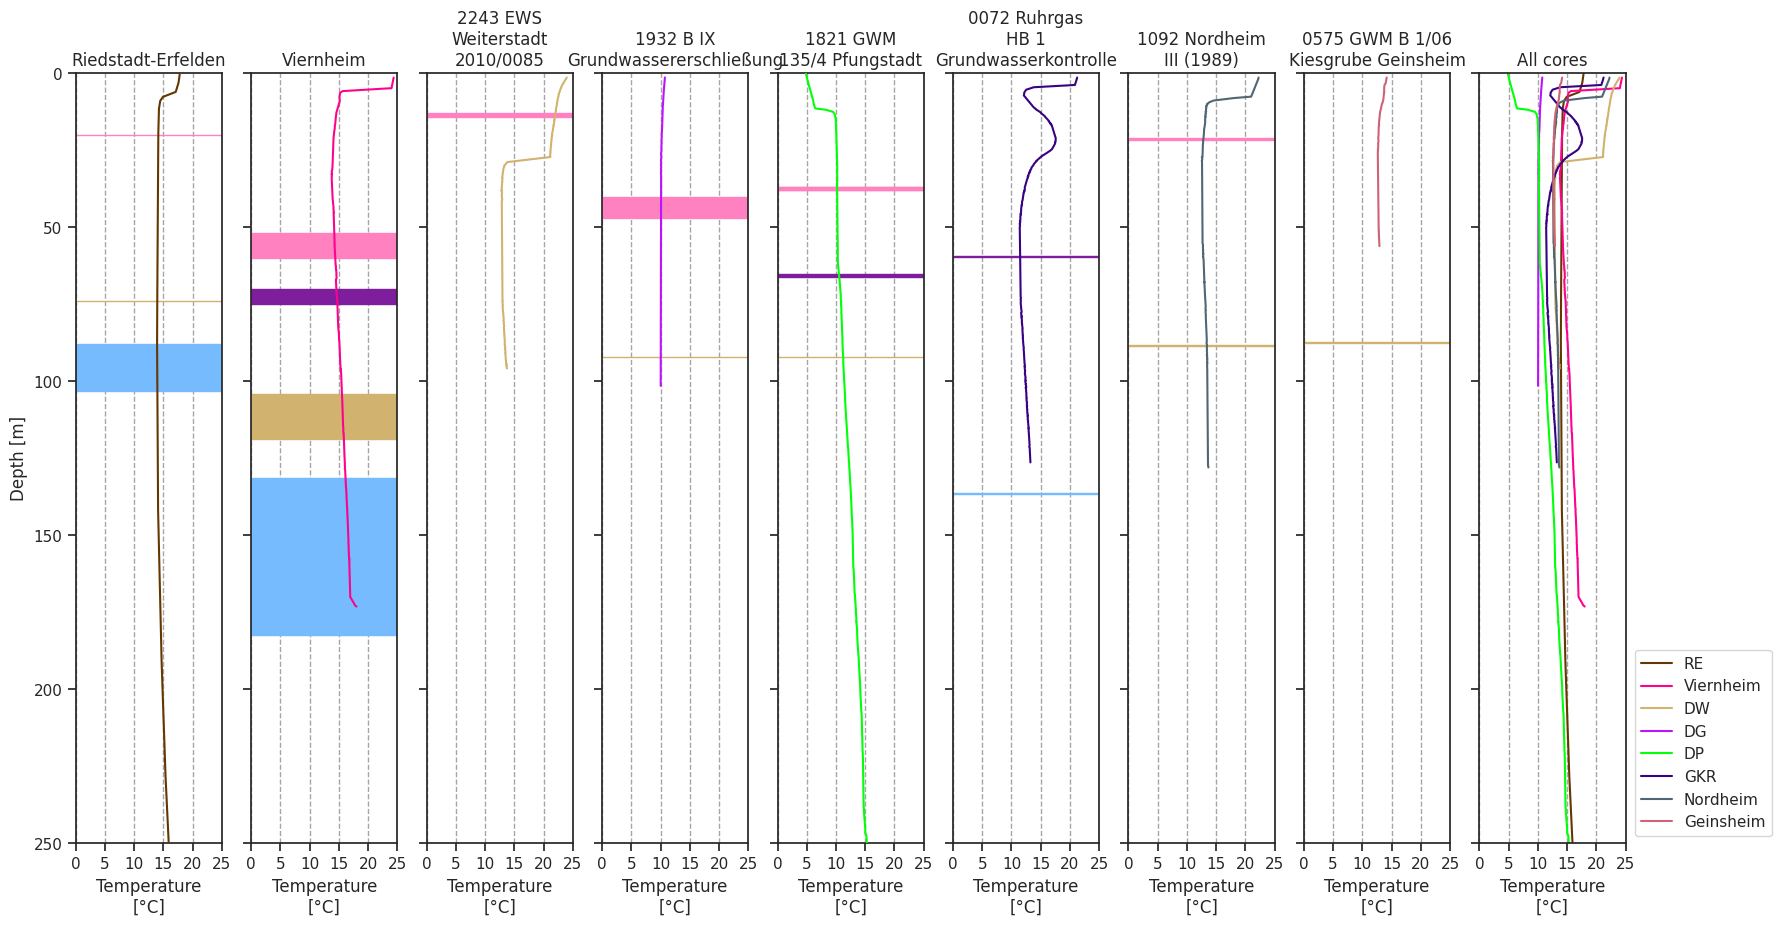

In [375]:
#plotting Viernheim & P34 data
rows = 1
cols = 9
fig, ax = plt.subplots(nrows=rows, ncols= cols, figsize = (20,10), sharey =True)

#Riedstadt
ax[0].plot(RE_CSV["temp. C"], RE_CSV["depth [m]"], color='#653700',zorder=10)
ax[0].set_title("Riedstadt-Erfelden")
ax[0].set_xlabel("Temperature\n[°C]")
ax[0].set_ylabel("Depth [m]")
ax[0].axhspan(20,20.1,color='#ff81c0') #Group 3
ax[0].axhspan(73.8,74,color='#d1b26f') #Group 5
ax[0].axhspan(87.9,103.1,color='#75bbfd') #Group 6

#Viernheim
ax[1].plot(Vi_CSV["temp. C"], Vi_CSV["depth [m]"], color='#ff028d',zorder=10)
ax[1].set_title("Viernheim")
ax[1].set_xlabel("Temperature\n[°C]")
ax[1].axhspan(51.7,59.8,color='#ff81c0') #Group 3
ax[1].axhspan(70,74.7,color='#7e1e9c') #Group 4
ax[1].axhspan(104.1,118.6,color='#d1b26f') #Group 5
ax[1].axhspan(131.25,182.4,color='#75bbfd') #Group 6
#Darmstadt cores
ax[2].plot(We_CSV["temp. C"], We_CSV["depth [m]"], color='#d1b26f',zorder=10)
ax[2].set_title("2243 EWS\nWeiterstadt\n2010/0085")
ax[2].axhspan(13,14,color='#ff81c0')
ax[2].set_xlabel("Temperature\n[°C]")
ax[3].plot(DaG_CSV["temp. C"], DaG_CSV["depth [m]"], color='#bc13fe',zorder=10)
ax[3].set_title("1932 B IX\nGrundwassererschließung")
ax[3].axhspan(40,47,color='#ff81c0')
ax[3].axhspan(92.2,92.2,color='#d1b26f') #Group 5
ax[3].set_xlabel("Temperature\n[°C]")
ax[4].plot(DaP_CSV["temp. C"], DaP_CSV["depth [m]"], color='#01ff07',zorder=10)
ax[4].set_title("1821 GWM\n135/4 Pfungstadt")
ax[4].axhspan(37,38,color='#ff81c0')
ax[4].set_xlabel("Temperature\n[°C]")
ax[4].axhspan(37,38,color='#ff81c0') #Group 3
ax[4].axhspan(65,66,color='#7e1e9c') #Group 4
ax[4].axhspan(92.2,92.2,color='#d1b26f') #Group 5
#Gernsheim
ax[5].plot(GKR_CSV["temp. C"], GKR_CSV["depth [m]"], color='#380282',zorder=10)
ax[5].set_title("0072 Ruhrgas\nHB 1\nGrundwasserkontrolle")
ax[5].set_xlabel("Temperature\n[°C]")
ax[5].axhspan(59.2,59.7,color='#7e1e9c') #Group 4
ax[5].axhspan(136.3,136.4,color='#75bbfd') #Group 6

ax[6].plot(No_CSV["temp. C"], No_CSV["depth [m]"], color='#516572',zorder=10)
ax[6].set_title("1092 Nordheim\nIII (1989)")
ax[6].axhspan(21,21.5,color='#ff81c0')
ax[6].set_xlabel("Temperature\n[°C]")
ax[6].axhspan(88.3,88.4,color='#d1b26f')
#Geinsheim
ax[7].plot(Ge_CSV["temp. C"], Ge_CSV["depth [m]"], color='#cf6275',zorder=10)
ax[7].set_title("0575 GWM B 1/06\nKiesgrube Geinsheim")
ax[7].set_xlabel("Temperature\n[°C]")
ax[7].axhspan(87.3,87.45,color='#d1b26f')

#All
ax[8].plot(RE_CSV["temp. C"], RE_CSV["depth [m]"], color='#653700', label='RE')
ax[8].plot(Vi_CSV["temp. C"], Vi_CSV["depth [m]"], color='#ff028d', label='Viernheim')
ax[8].plot(We_CSV["temp. C"], We_CSV["depth [m]"], color='#d1b26f', label='DW')
ax[8].plot(DaG_CSV["temp. C"], DaG_CSV["depth [m]"], color='#bc13fe', label='DG')
ax[8].plot(DaP_CSV["temp. C"], DaP_CSV["depth [m]"], color='#01ff07', label='DP')
ax[8].plot(GKR_CSV["temp. C"], GKR_CSV["depth [m]"], color='#380282', label='GKR')
ax[8].plot(No_CSV["temp. C"], No_CSV["depth [m]"], color='#516572', label='Nordheim')
ax[8].plot(Ge_CSV["temp. C"], Ge_CSV["depth [m]"], color='#cf6275', label='Geinsheim')

ax[8].set_title("All cores")
ax[8].legend(loc="lower right", bbox_to_anchor=(2.05, 0.0))
ax[8].set_xlabel("Temperature\n[°C]")

#set y axis
plt.ylim(0,250)
plt.gca().invert_yaxis()

# Set x-axis limits for all subplots
for a in ax:
    a.set_xlim(0, 25)
    a.set_xticks(range(0, 26, 5))  # Tick marks every 5 degrees
    a.grid(axis='x', linestyle='--', color='gray', alpha=0.7)  # Add grid lines

#SI Plots

Plotting the %FAA against D/L values for Ala and Val to demonstrate increase %FAA against extent of racemise. Show in SI Fig S1.

(0.0, 1.5)

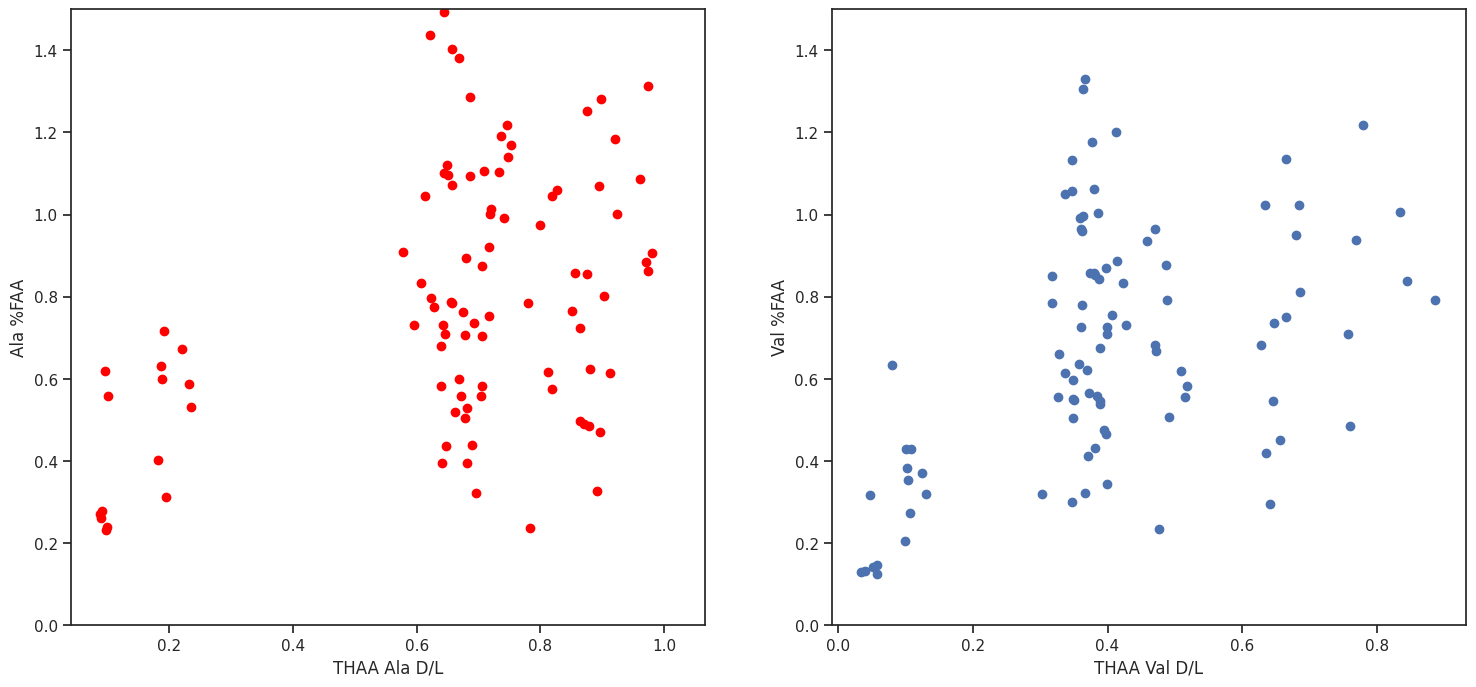

In [376]:
group_means = FAA_per.groupby(['Sample name'], as_index=False).agg('mean')

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))


ax[0].scatter(group_means["Ala D/L"], group_means["[Ala]"],color="red")
ax[0].set_xlabel("THAA Ala D/L")
ax[0].set_ylabel("Ala %FAA")
ax[0].set_ylim([0, 1.5])
ax[1].scatter(group_means["Val D/L"], group_means["[Val]"])
ax[1].set_xlabel("THAA Val D/L")
ax[1].set_ylabel("Val %FAA")
plt.ylim([0, 1.5])

SI Fig S2: all data produced, with outlying datapoints highlighted. They were removed from the rest of the data analysis.

In [377]:
#import all data including outliers

FAA_all = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EQuaTe data/Germany/HeidelbergBasin/HB_frees_alldata.csv", sep=',', encoding='latin-1')
THAA_all = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EQuaTe data/Germany/HeidelbergBasin/HB_hyds_alldata.csv", sep=',', encoding='latin-1')

df_FAAALL = pd.DataFrame(FAA_all)
df_THAAALL = pd.DataFrame(THAA_all)

df_FAAALL = df_FAAALL.add_suffix("_FAA")
#replacing NaN values with 0s to prevent code failure
#column numbers should match index for Asx D/L to Total column labels
for col in df_FAAALL.columns[14:27]:
    df_FAAALL[col] = pd.to_numeric(df_FAAALL[col], errors="coerce")

df_FAAALL = df_FAAALL.replace(np.nan, 0.0, regex=True)

df_FAAALL.sort_values(by=['NEaarNo_FAA'], ascending=True)


df_THAAALL = df_THAAALL.add_suffix("_THAA")

for col in df_THAAALL.columns[14:25]:
    df_THAAALL[col] = pd.to_numeric(df_THAAALL[col], errors="coerce")

df_THAAALL = df_THAAALL.replace(np.nan, 0.0, regex=True)
#FAA_THAA = FAA_THAA.sort_values(by=['Depth_FAA'], ascending=True)
df_THAAALL = df_THAAALL.sort_values(by=['NEaarNo_THAA'], ascending=True)


In [378]:
#concatenating df_FAA and df_THAA dataframes. Only df_FAA catagory columns will be included in this table
df_alldata =  pd.concat([df_FAAALL, df_THAAALL[[("Asx D/L_THAA"),
                                           ("Glx D/L_THAA"),
                                           ("Ser D/L_THAA"),
                                           ("Arg D/L_THAA"),
                                           ("Ala D/L_THAA"),
                                                ("Val D/L_THAA"),
                                           ("Phe D/L_THAA"),
                                           ("Leu D/L_THAA"),
                                           ("Ile D/L_THAA"),
                                          ]]], axis=1)

In [379]:
#concatenating df_FAA and df_THAA dataframes. Only df_FAA catagory columns will be included in this table
df_mean_sites = df_alldata

#df_mean_all = df_mean_all.sort_values(["Age rank_FAA", "Quaternary sites_FAA"], inplace=False, ascending=True)
df_mean_sites["Horizon"] = df_alldata['Quaternary sites_FAA'] + " " + df_alldata["Depth_FAA"].astype(str)

df_mean_sites["Quaternary sites_FAA"].unique()

array(['M-Lindenhof', 'L-Maudach A36', 'L-Parkinsel P35',
       'L-Parkinsel P34', 'Viernheim', 'Riedstadt-Erfelden',
       'Groß-Rohrheim', 'Klein-Rohrheim', 'Heilbronn-Bockingen',
       'Eppelheim', 'Einhausen', 'Pfungstadt', 'Griesheim', 'Geinsheim',
       'Nordheim', 'Trebur-Hessenaue', 'Weiterstadt', 'D-Eberstadt',
       'Bobstadt'], dtype=object)

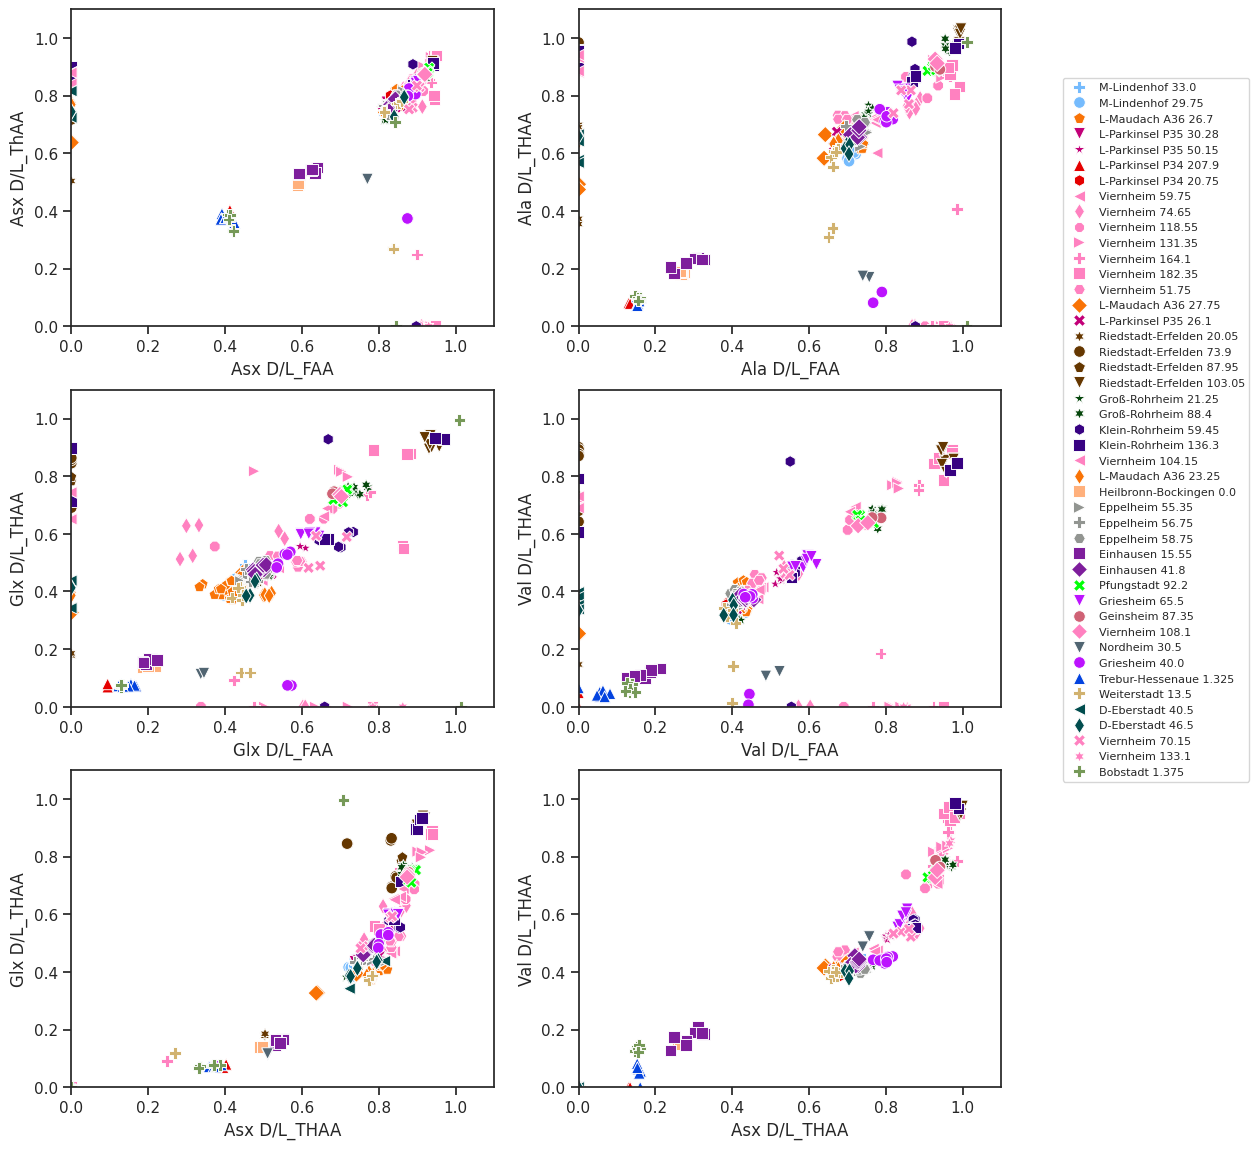

In [380]:
#The following code is to create plots which defines colour by borehole and not MS cycle
#all colours at https://xkcd.com/color/rgb/ 'o', 'p', 'v', '*', '^', 'h', '<',  'd', '8', '>', 'P', 's', 'X', (6,1,0), 'H', 'D'

markers = ['P', 'o', 'p', 'v', '*', '^', 'h', '<',  'd', '8', '>', 'P', 's', 'H', 'D', 'X', (6,1,0),
           'o', 'p', 'v', '*', (6,1,0), 'h', 's', '<',  'd', 's', '>', 'P', 'H', 's', 'D', 'X', 'v',
           'o', 'D', 'v', 'o', '^', 'P', '<',  'd', "X", (6,1,0), 'P']


sns.set(style="ticks")
fig, ax = plt.subplots(3, 2, figsize=(12, 14))
sns.scatterplot(ax=ax[0,0], x=df_mean_sites["Asx D/L_FAA"], y=df_mean_sites["Asx D/L_THAA"],
                         data=df_mean_sites, hue=df_mean_sites["Quaternary sites_FAA"],
                         style=df_mean_sites["Horizon"],
                         markers=markers, s=70, palette=palette_borehole, legend=False)
ax[0,0].set_xlabel("Asx D/L_FAA")
ax[0,0].set_ylabel("Asx D/L_ThAA")
ax[0,0].set_ylim(0,1.1)
ax[0,0].set_xlim(0,1.1)

sns.scatterplot(ax=ax[0,1], x=df_mean_sites["Ala D/L_FAA"], y=df_mean_sites["Ala D/L_THAA"],
                         data=df_mean_sites, hue=df_mean_sites["Quaternary sites_FAA"],
                         style=df_mean_sites["Horizon"],
                         markers=markers, s=70, palette=palette_borehole, legend=False)
ax[0,1].set_xlabel("Ala D/L_FAA")
ax[0,1].set_ylabel("Ala D/L_THAA")
ax[0,1].set_ylim(0,1.1)
ax[0,1].set_xlim(0,1.1)

sns.scatterplot(ax=ax[1,0], x=df_mean_sites["Glx D/L_FAA"], y=df_mean_sites["Glx D/L_THAA"],
                         data=df_mean_sites, hue=df_mean_sites["Quaternary sites_FAA"],
                         style=df_mean_sites["Horizon"],
                         markers=markers, s=70, palette=palette_borehole, legend=False)
ax[1,0].set_xlabel("Glx D/L_FAA")
ax[1,0].set_ylabel("Glx D/L_THAA")
ax[1,0].set_ylim(0,1.1)
ax[1,0].set_xlim(0,1.1)

depth_to_site_dict = df_mean_sites.set_index("Horizon")["Quaternary sites_FAA"].to_dict()
df_mean_sites['Subscale'] = df_mean_sites['Horizon'].map(depth_to_site_dict)
df_mean_sites['Subscale'] = pd.Categorical(df_mean_sites['Subscale'])  # creates a fixed order
sns.scatterplot(ax=ax[1,1], x=df_mean_sites["Val D/L_FAA"], y=df_mean_sites["Val D/L_THAA"],
                         data=df_mean_sites, hue=df_mean_sites["Subscale"],
                         style=df_mean_sites["Horizon"],
                         markers=markers, s=70, palette=palette_borehole)
ax[1,1].set_xlabel("Val D/L_FAA")
ax[1,1].set_ylabel("Val D/L_THAA")
ax[1,1].set_ylim(0,1.1)
ax[1,1].set_xlim(0,1.1)

sns.scatterplot(ax=ax[2,0], x=df_mean_sites["Asx D/L_THAA"], y=df_mean_sites["Glx D/L_THAA"],
                         data=df_mean_sites, hue=df_mean_sites["Quaternary sites_FAA"],
                         style=df_mean_sites["Horizon"],
                         markers=markers, s=70, palette=palette_borehole, legend=False)
ax[2,0].set_xlabel("Asx D/L_THAA")
ax[2,0].set_ylabel("Glx D/L_THAA")
ax[2,0].set_ylim(0,1.1)
ax[2,0].set_xlim(0,1.1)

depth_to_site_dict = df_mean_sites.set_index("Horizon")["Quaternary sites_FAA"].to_dict()
df_mean_sites['Subscale'] = df_mean_sites['Horizon'].map(depth_to_site_dict)
df_mean_sites['Subscale'] = pd.Categorical(df_mean_sites['Subscale'])  # creates a fixed order
sns.scatterplot(ax=ax[2,1], x=df_mean_sites["Ala D/L_FAA"], y=df_mean_sites["Val D/L_FAA"],
                         data=df_mean_sites, hue=df_mean_sites["Subscale"],
                         style=df_mean_sites["Horizon"],
                         markers=markers, s=70, palette=palette_borehole, legend=False)
ax[2,1].set_xlabel("Asx D/L_THAA")
ax[2,1].set_ylabel("Val D/L_THAA")
ax[2,1].set_ylim(0,1.1)
ax[2,1].set_xlim(0,1.1)

# create a dictionary mapping the subscales to their color
handles, labels = ax[1,1].get_legend_handles_labels()
index_depth_title = labels.index("Horizon")
color_dict = {label: handle.get_markerfacecolor()
for handle, label in zip(handles[1:index_depth_title], labels[1:index_depth_title])}
# loop through the items, assign color via the subscale of the item idem
for handle, label in zip(handles[index_depth_title + 1:], labels[index_depth_title + 1:]):
  handle.set_markerfacecolor(color_dict[depth_to_site_dict[label]])
#create a legend only using the items
#legend1 = plt.legend(handles[index_depth_title + 1:], labels[index_depth_title + 1:], title='Site & Horizon',
 #                   loc="upper center", bbox_to_anchor=(0.5, -0.05), fontsize=10, ncol=5)

legend = ax[1, 1].legend(handles[index_depth_title + 1:], labels[index_depth_title + 1:], loc='upper right', ncol=1,
                         fontsize=8)
legend.set_bbox_to_anchor((1.6, 2))  # Adjust the anchor point for the legend

plt.show()